In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data  = pd.read_csv('./data/loan_2014_18.csv')

/var/folders/p0/t_h8gvcn7_9f4czc2svytb4h0000gn/T/ipykernel_82448/173927535.py:5: DtypeWarning: Columns (48,58,117) have mixed types. Specify dtype option on import or set low_memory=False.
  data  = pd.read_csv('loan_2014_18.csv')


We only care about 'loan_status' of 'Fully paid' and 'Charged off'.<br>
So we only keep samples with 'loan_status' being 'Fully paid' and 'Charged off' and transform them into 0 and 1.

In [ ]:
# only keep the rows with loan_status as Fully Paid or Charged Off
data = data[data['loan_status'].isin(['Fully Paid', 'Charged Off'])]
data.loc[data['loan_status'] == 'Fully Paid', 'loan_status'] = 0
data.loc[data['loan_status'] == 'Charged Off', 'loan_status'] = 1
data.reset_index(drop=True, inplace=True)

In [ ]:
data

Unnamed: 0         id  loan_amnt  funded_amnt  funded_amnt_inv  \
0                 0  120122535    12000.0      12000.0          12000.0   
1                 6  119183129    10000.0      10000.0          10000.0   
2                 7  120086024     8000.0       8000.0           8000.0   
3                 8  119417303    12800.0      12800.0          12800.0   
4                12  119997711    15000.0      15000.0          15000.0   
...             ...        ...        ...          ...              ...   
1552748      105446  102556443    24000.0      24000.0          24000.0   
1552749      105447  102653304    10000.0      10000.0          10000.0   
1552750      105448  102628603    10050.0      10050.0          10050.0   
1552751      105449  102196576     6000.0       6000.0           6000.0   
1552752      105450   99799684    30000.0      30000.0          30000.0   

               term int_rate  installment grade sub_grade  ...  \
0         36 months    7.97%       375.88     A        A5  ...   
1         36 months    9.44%       320.05     B        B1  ...   
2         36 months   16.02%       281.34     C        C5  ...   
3         36 months   13.59%       434.93     C        C2  ...   
4         36 months   13.59%       509.69     C        C2  ...   
...             ...      ...          ...   ...       ...  ...   
1552748   60 months   23.99%       690.30     E        E2  ...   
1552749   36 months    7.99%       313.32     A        A5  ...   
1552750   36 months   16.99%       358.26     D        D1  ...   
1552751   36 months   11.44%       197.69     B        B4  ...   
1552752   60 months   25.49%       889.18     E        E4  ...   

        hardship_start_date hardship_end_date payment_plan_start_date  \
0                       NaN               NaN                     NaN   
1                       NaN               NaN                     NaN   
2                       NaN               NaN                     NaN   
3                       NaN               NaN                     NaN   
4                       NaN               NaN                     NaN   
...                     ...               ...                     ...   
1552748                 NaN               NaN                     NaN   
1552749                 NaN               NaN                     NaN   
1552750                 NaN               NaN                     NaN   
1552751                 NaN               NaN                     NaN   
1552752                 NaN               NaN                     NaN   

         hardship_length hardship_dpd hardship_loan_status  \
0                    NaN          NaN                  NaN   
1                    NaN          NaN                  NaN   
2                    NaN          NaN                  NaN   
3                    NaN          NaN                  NaN   
4                    NaN          NaN                  NaN   
...                  ...          ...                  ...   
1552748              NaN          NaN                  NaN   
1552749              NaN          NaN                  NaN   
1552750              NaN          NaN                  NaN   
1552751              NaN          NaN                  NaN   
1552752              NaN          NaN                  NaN   

        orig_projected_additional_accrued_interest  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   
...                                            ...   
1552748                                        NaN   
1552749                                        NaN   
1552750                                        NaN   
1552751                                        NaN   
1552752                                        NaN   

        hardship_payoff_balance_amount hards

# Data preprocessing

## Basic transformation into numerical type

Then we according to the experience of reality finance, choose 50 variables to continue our prediction.<br>
This selection is also because of expensive computational cost.

In [ ]:
# selected features
selected_features = ['loan_amnt','term','int_rate','installment','grade','purpose','emp_length','home_ownership',
                     'annual_inc','verification_status','dti','fico_range_low','delinq_2yrs','mths_since_last_delinq',
                     'pub_rec','revol_util','revol_bal','open_acc','total_acc','num_actv_bc_tl','num_bc_sats',
                     'num_rev_tl_bal_gt_0','acc_now_delinq','total_bal_ex_mort','avg_cur_bal','tot_cur_bal',
                     'bc_open_to_buy','bc_util','chargeoff_within_12_mths','delinq_amnt','mths_since_recent_bc',
                     'mths_since_recent_inq','num_op_rev_tl','num_rev_accts','num_actv_rev_tl','total_rev_hi_lim',
                     'inq_fi','inq_last_12m','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m',
                     'percent_bc_gt_75','tax_liens','pub_rec_bankruptcies','collections_12_mths_ex_med',
                     'initial_list_status','application_type','open_il_12m','open_rv_12m','total_bc_limit','loan_status']
data = data[selected_features]
data = data.drop(data[data['home_ownership']=='NONE'].index, axis=0)

Some necessary transformations in order to change all the variables into numerical forms.

In [ ]:
# change 'purpose' :transform some types into majority type
data.loc[data['purpose'].isin(['car', 'small_business','vacation',
                             'moving','renewable_energy',
                             'wedding','educational']), 'purpose'] = 'major_purchase'
data.loc[data['purpose'].isin(['house']), 'purpose'] = 'home_improvement'

In [ ]:
# transform string into numerical
# int_rate: 10.65% -> 10.65
# revol_util: 83.7% -> 83.7

#transform int_rate
data.loc[:,'int_rate'] = data['int_rate'].str.rstrip('%').astype(float)
data['int_rate'] = data['int_rate'].astype(float)
#transform revol_util
data.loc[:,'revol_util'] = data['revol_util'].str.rstrip('%').astype(float)
data['revol_util'] = data['revol_util'].astype(float)

In [ ]:
# term: 36 months -> 36, 60 months -> 60
# emp_length: < 1 year -> 0, 10+ years -> 10

#transform term
data['term'] = data['term'].str.extract(r'(\d+)').astype(int)
data.loc[data['term'] == 36, 'term'] = 0
data.loc[data['term'] == 60, 'term'] = 1
#transform emp_length
data['emp_length'] = data['emp_length'].replace({'< 1 year': '0 year', '10+ years': '10 years'})
data['emp_length'] = data['emp_length'].str.extract(r'(\d+)').astype(float)

In [ ]:
# transform ordinal data
# grade: A -> 1, B -> 2, ..., G -> 7
# initial_list_status: f -> 0, w -> 1
# application_type: Individual -> 0, Joint App -> 1
# hardship_flag: N -> 0, Y -> 1

# transform grade
data['grade'] = data['grade'].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})
# transform initial_list_status
data['initial_list_status'] = data['initial_list_status'].replace({'f': 0, 'w': 1})
# transform application_type
data['application_type'] = data['application_type'].replace({'Individual': 0, 'Joint App': 1})

/var/folders/p0/t_h8gvcn7_9f4czc2svytb4h0000gn/T/ipykernel_82448/1564811102.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['grade'] = data['grade'].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})
/var/folders/p0/t_h8gvcn7_9f4czc2svytb4h0000gn/T/ipykernel_82448/1564811102.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['initial_list_status'] = data['initial_list_status'].replace({'f': 0, 'w': 1})
/var/folders/p0/t_h8gvcn7_9f4czc2svytb4h0000gn/T/ipykernel_82448/1564811102.py:12: FutureWarning: D

## Dealing with missing values

In [ ]:

# 70% for training, 15% for validation, 15% for testing
from sklearn.model_selection import train_test_split
x = data.drop('loan_status', axis=1)
y = data['loan_status']
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
x_train.reset_index(drop=True, inplace=True)
x_val.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)
# pd.concat
train = pd.concat([x_train, y_train], axis=1)
val = pd.concat([x_val, y_val], axis=1)
test = pd.concat([x_test, y_test], axis=1)

In [ ]:
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

mths_since_last_delinq    536412
inq_last_12m              432586
inq_fi                    432585
open_il_12m               432585
open_rv_12m               432585
mths_since_recent_inq     110101
emp_length                 70778
num_tl_120dpd_2m           46344
bc_util                    12940
percent_bc_gt_75           12627
bc_open_to_buy             12320
mths_since_recent_bc       11602
revol_util                   729
dti                          653
avg_cur_bal                   18
num_rev_accts                  1
dtype: int64

For 'mths_since_last_delinq', we have detected that the value 0 means the borrower's last delinq happened in the month when the dataset was collected.<br>
And all the missing values mean that the borrows never have history of delinq, so we can fill missing values with -1.

In [ ]:
# 这里用-1填充是因为我查看了其跟delinq_2yrs的关系，发现0并非代表没有逾期，而是代表数据集发布的当月逾期了
# 而实际上这些缺失值是没有逾期数据导致的，所以这里用-1填充
train['mths_since_last_delinq'] = train['mths_since_last_delinq'].fillna(-1)
test['mths_since_last_delinq'] = test['mths_since_last_delinq'].fillna(-1)
val['mths_since_last_delinq'] = val['mths_since_last_delinq'].fillna(-1)

We decide to delect variables with more that 15% missing values because we have found that there are no significant difference when we remove such variables.

In [ ]:
too_much_missing_columns = ['inq_last_12m','inq_fi','open_il_12m','open_rv_12m']
# drop too_much_missing_columns
train = train.drop(columns=too_much_missing_columns)
test = test.drop(columns=too_much_missing_columns)
val = val.drop(columns=too_much_missing_columns)

For the rest variables, we fill missing values with median.

In [ ]:
# use median to fill in missing values of median_filling_columns
train['num_rev_accts'] = train['num_rev_accts'].fillna(train['num_rev_accts'].median())
median_filling_columns = ['emp_length','mths_since_recent_inq','num_tl_120dpd_2m','bc_util','percent_bc_gt_75',
                          'bc_open_to_buy','mths_since_recent_bc','revol_util','dti','avg_cur_bal']
# fill missing values of median_filling_columns with median
for column in median_filling_columns:
    train[column] = train[column].fillna(train[column].median())
    test[column] = test[column].fillna(train[column].median())
    val[column] = val[column].fillna(train[column].median())


Construct a new variable called 'income_to_pymnt_ratio'.

In [ ]:
train['income_to_pymnt_ratio'] = (train['annual_inc']/12)/train['installment']
test['income_to_pymnt_ratio'] = (test['annual_inc']/12)/test['installment']
val['income_to_pymnt_ratio'] = (val['annual_inc']/12)/val['installment']

Finally we remove some sparse variables, over 95% values of them are 0, so we think such variables can't provide enough useful information.

# EDA and Visualization

In [ ]:
x_train = train.drop(columns=['loan_status'])
y_train = train['loan_status']
x_val = val.drop(columns=['loan_status'])
y_val = val['loan_status']
x_test = test.drop(columns=['loan_status'])
y_test = test['loan_status']

We want to see firstly the distribution of categorical variables.<br>
Check the total distribution of categorical variables.

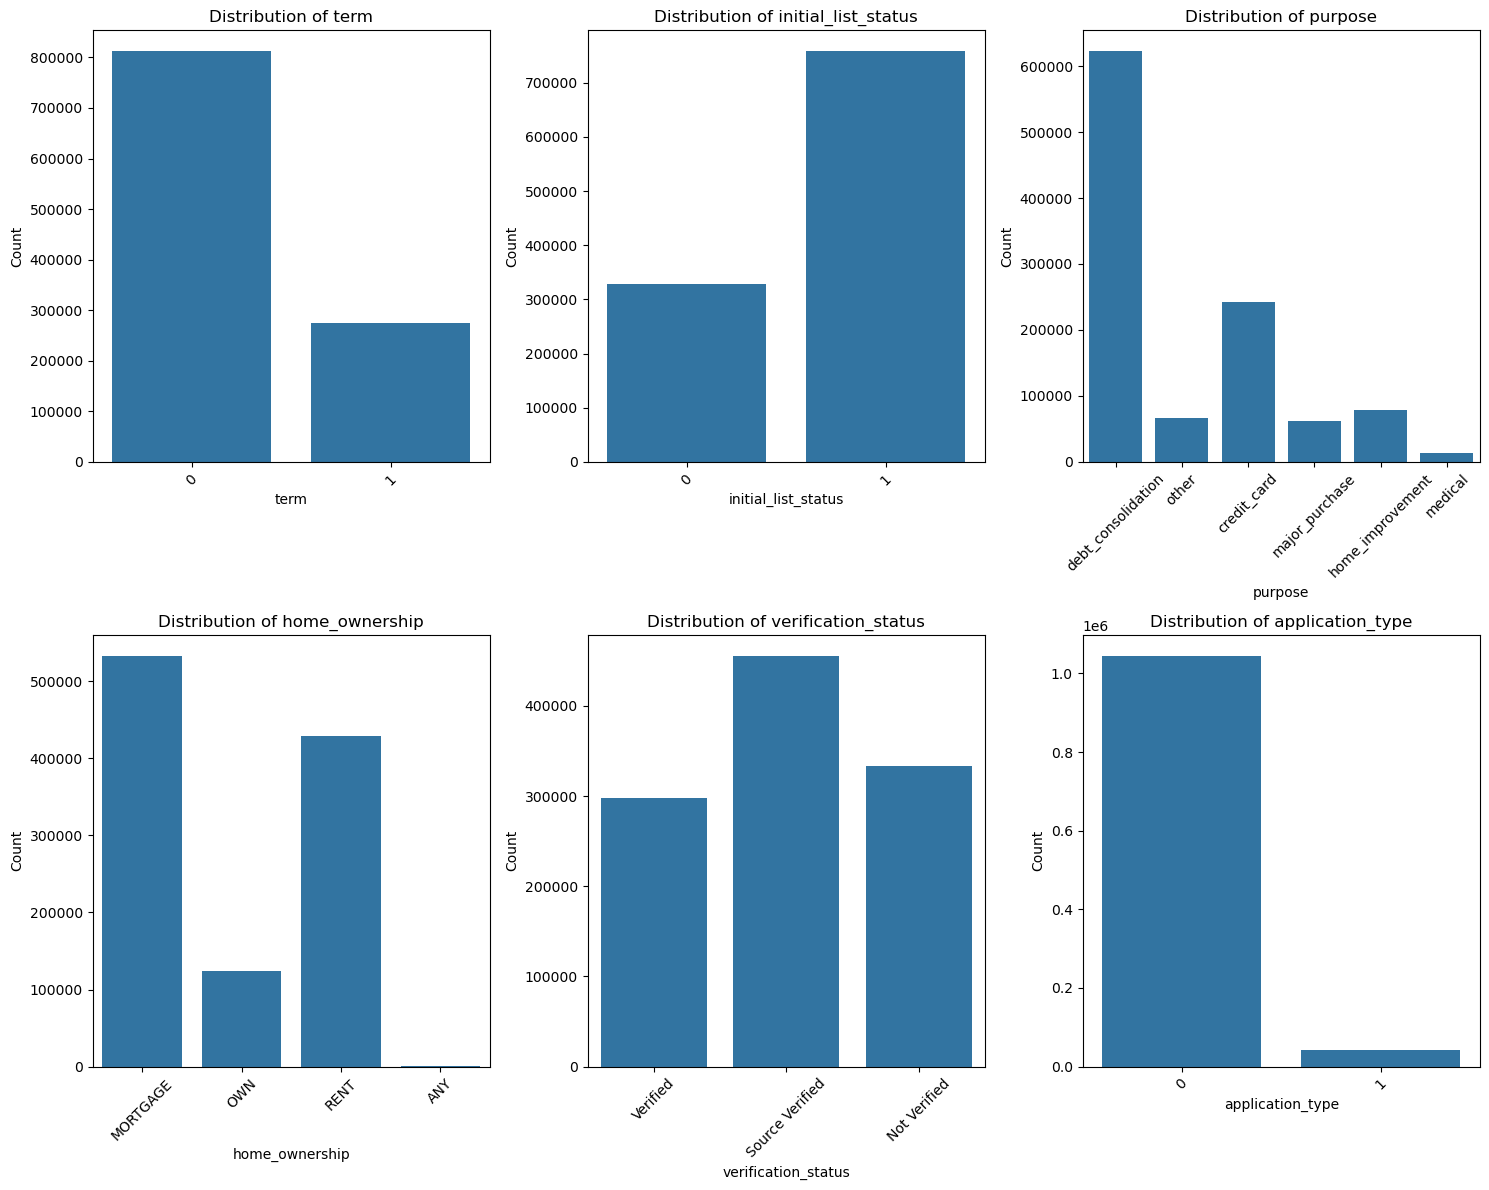

In [ ]:
# check distributions of each feature
# for categorical features, use countplot
cat_features = ['term','initial_list_status','purpose','home_ownership','verification_status','application_type']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,12))
axes = axes.flatten()
for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, data=x_train, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Compare distribution of categorical variables with different loan_status.

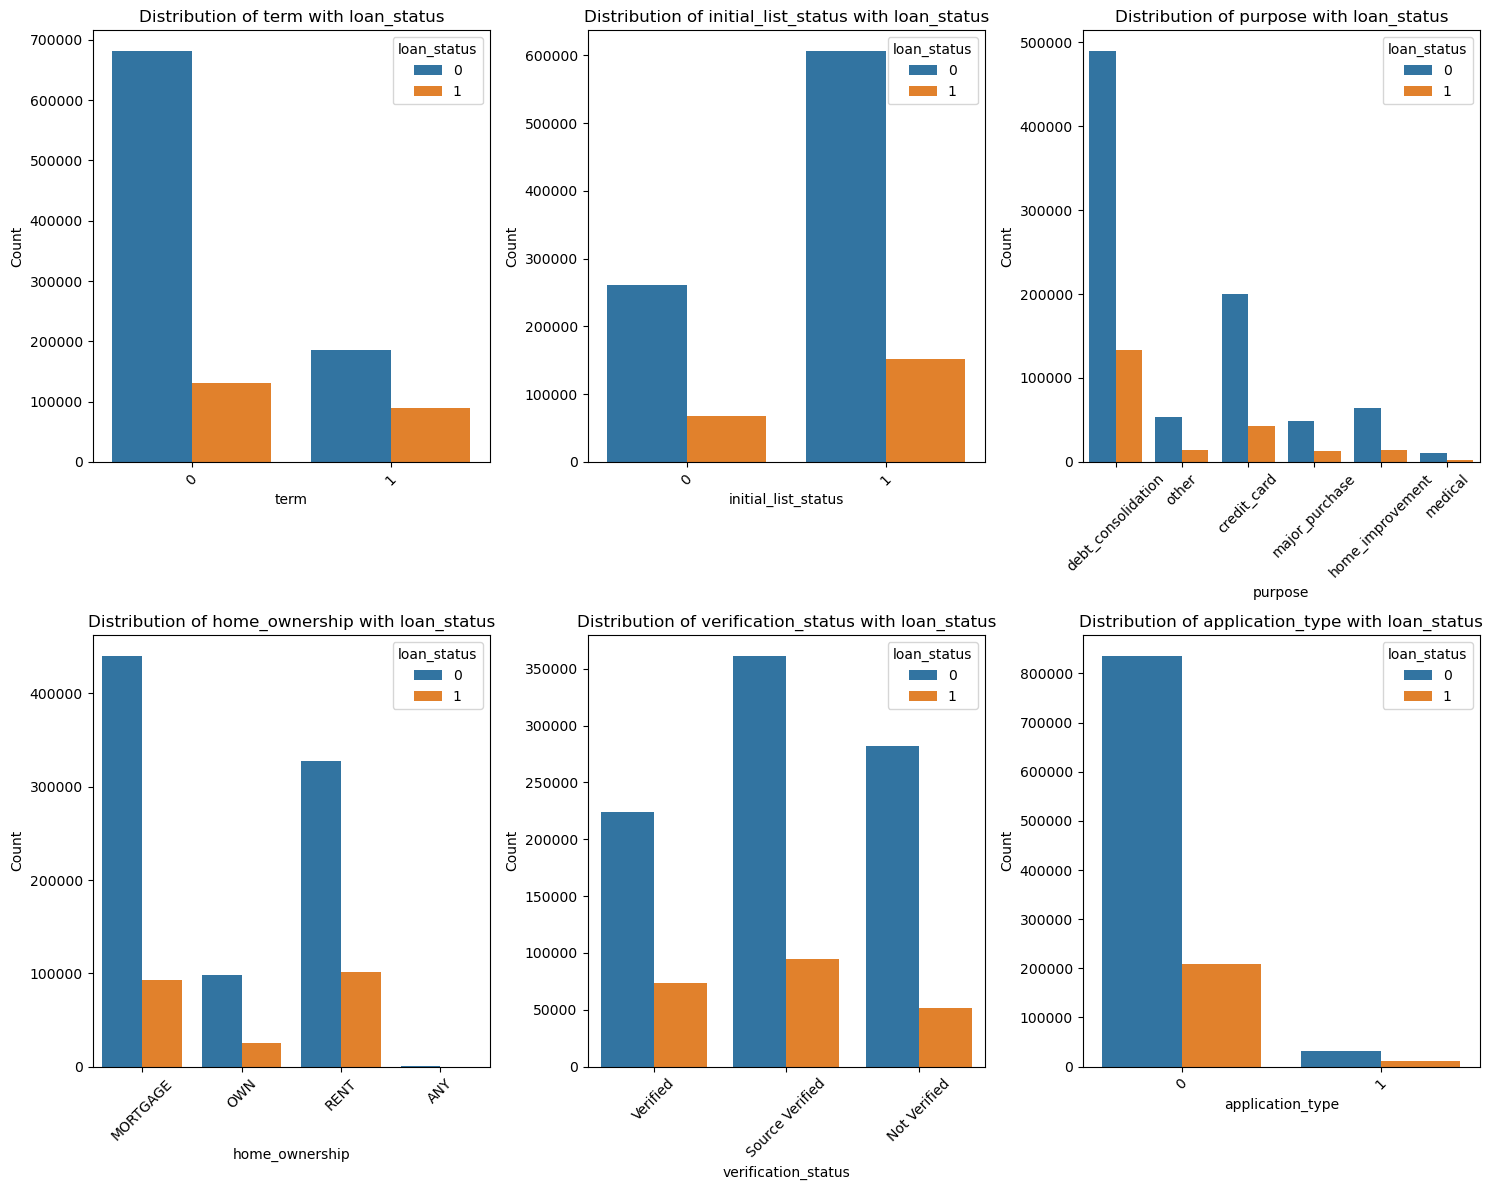

In [ ]:
# check distributions of categorical features with loan_status
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,12))
axes = axes.flatten()
for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, data=train, hue='loan_status', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} with loan_status')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Then we use chimerge to divide each variable into bins.<br>
The reason why we use this method is that when we fit random forest and xgboost, there is a severe problem that we are running out of computational resource.<br>
Therefore, we want to use chimerge to limit the possible selection range of each variable for tree-based methods.<br>
Meanwhile, chimerge can be beneficial to ease influence of outliers so that our model will be more robust.

In [ ]:
import scorecardpy as sc
cat_features = ['term','initial_list_status','purpose','home_ownership','verification_status', 'grade','emp_length']
train_need_to_box = x_train.drop(columns=cat_features)
train_need_to_box_y = pd.concat([train_need_to_box, y_train], axis=1)
val_need_to_box = x_val.drop(columns=cat_features)
val_need_to_box_y = pd.concat([val_need_to_box, y_val], axis=1)
test_need_to_box = x_test.drop(columns=cat_features)
test_need_to_box_y = pd.concat([test_need_to_box, y_test], axis=1)
bins = sc.woebin(train_need_to_box_y, y='loan_status', method='chimerge')
for feature in train_need_to_box.columns:
    bins[feature]['variable'] = feature
x_train_woe = sc.woebin_ply(train_need_to_box, bins)
x_test_woe = sc.woebin_ply(test_need_to_box, bins)
x_val_woe = sc.woebin_ply(val_need_to_box, bins)

[INFO] creating woe binning ...


/opt/anaconda3/lib/python3.12/site-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/opt/anaconda3/lib/python3.12/site-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/opt/anaconda3/lib/python3.12/site-packages/scorecardpy/woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass o

Binning on 1086924 rows and 41 columns in 00:00:32
[INFO] converting into woe values ...
Woe transformating on 1086924 rows and 40 columns in 00:00:23
[INFO] converting into woe values ...
[INFO] converting into woe values ...


See distribution of each variable with binned values.

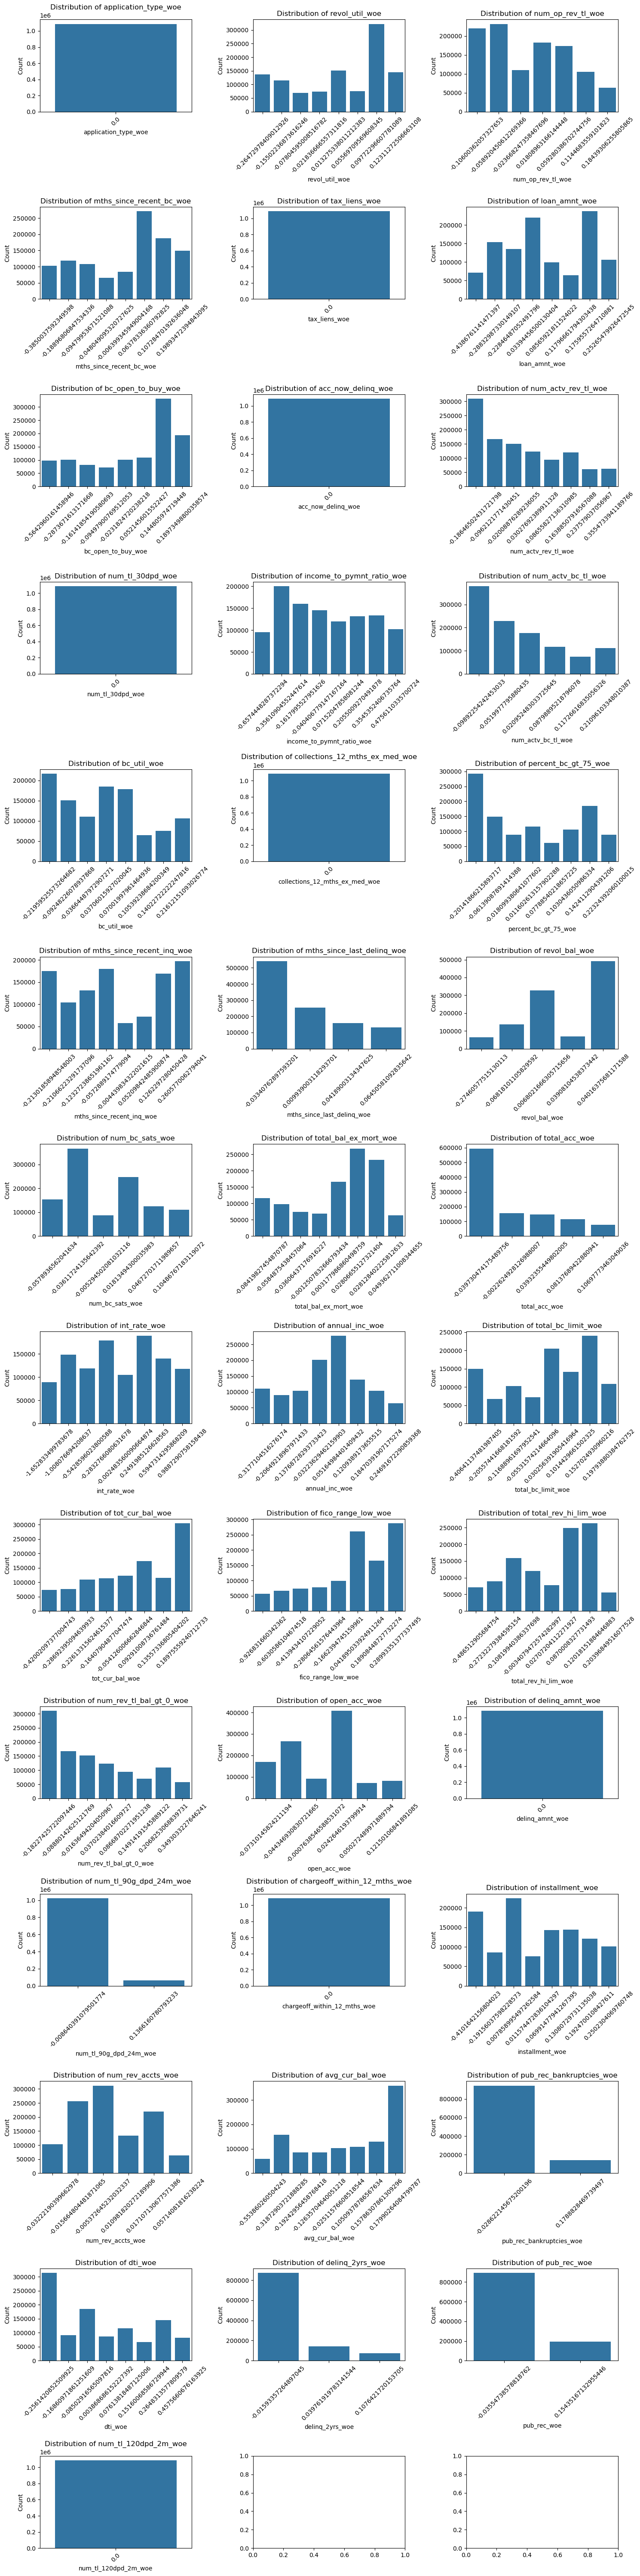

In [ ]:
# check distributions of binned features
fig, axes = plt.subplots(nrows=14, ncols=3, figsize=(15,60))
axes = axes.flatten()
for i, feature in enumerate(x_train_woe.columns):
    sns.countplot(x=feature, data=x_train_woe, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

From the plots, we can see that after binned, some variables can not give any useful information because they only have value 0, so we have to drop them.

In [ ]:
need_to_drop = ['acc_now_delinq_woe','delinq_amnt_woe','chargeoff_within_12_mths_woe','tax_liens_woe',
                'application_type_woe','collections_12_mths_ex_med_woe','num_tl_30dpd_woe',
                'num_tl_120dpd_2m_woe']
x_train_woe = x_train_woe.drop(columns=need_to_drop)
x_test_woe = x_test_woe.drop(columns=need_to_drop)
x_val_woe = x_val_woe.drop(columns=need_to_drop)

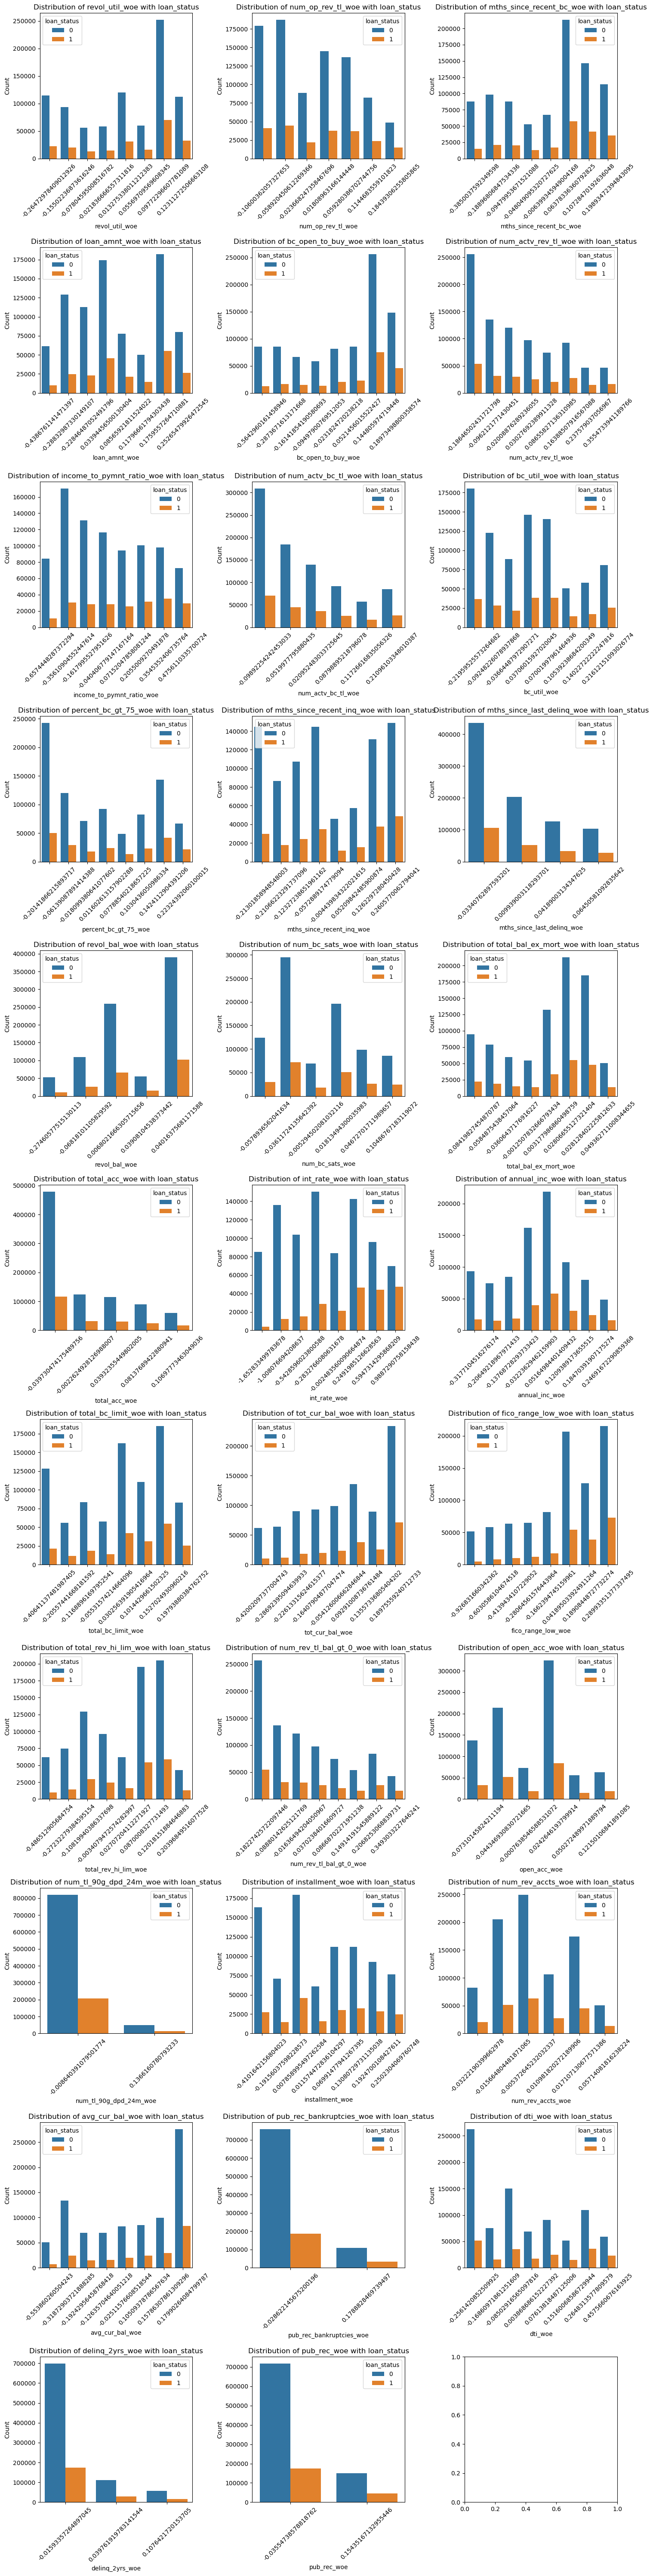

In [ ]:
# check distributions with loan_status
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(15,60))
axes = axes.flatten()
for i, feature in enumerate(x_train_woe.columns):
    sns.countplot(x=feature, data=pd.concat([x_train_woe, y_train], axis=1), hue='loan_status', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} with loan_status')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
x_train_final = pd.concat([x_train_woe, x_train[cat_features]], axis=1)
x_test_final = pd.concat([x_test_woe, x_test[cat_features]], axis=1)
x_val_final = pd.concat([x_val_woe, x_val[cat_features]], axis=1)

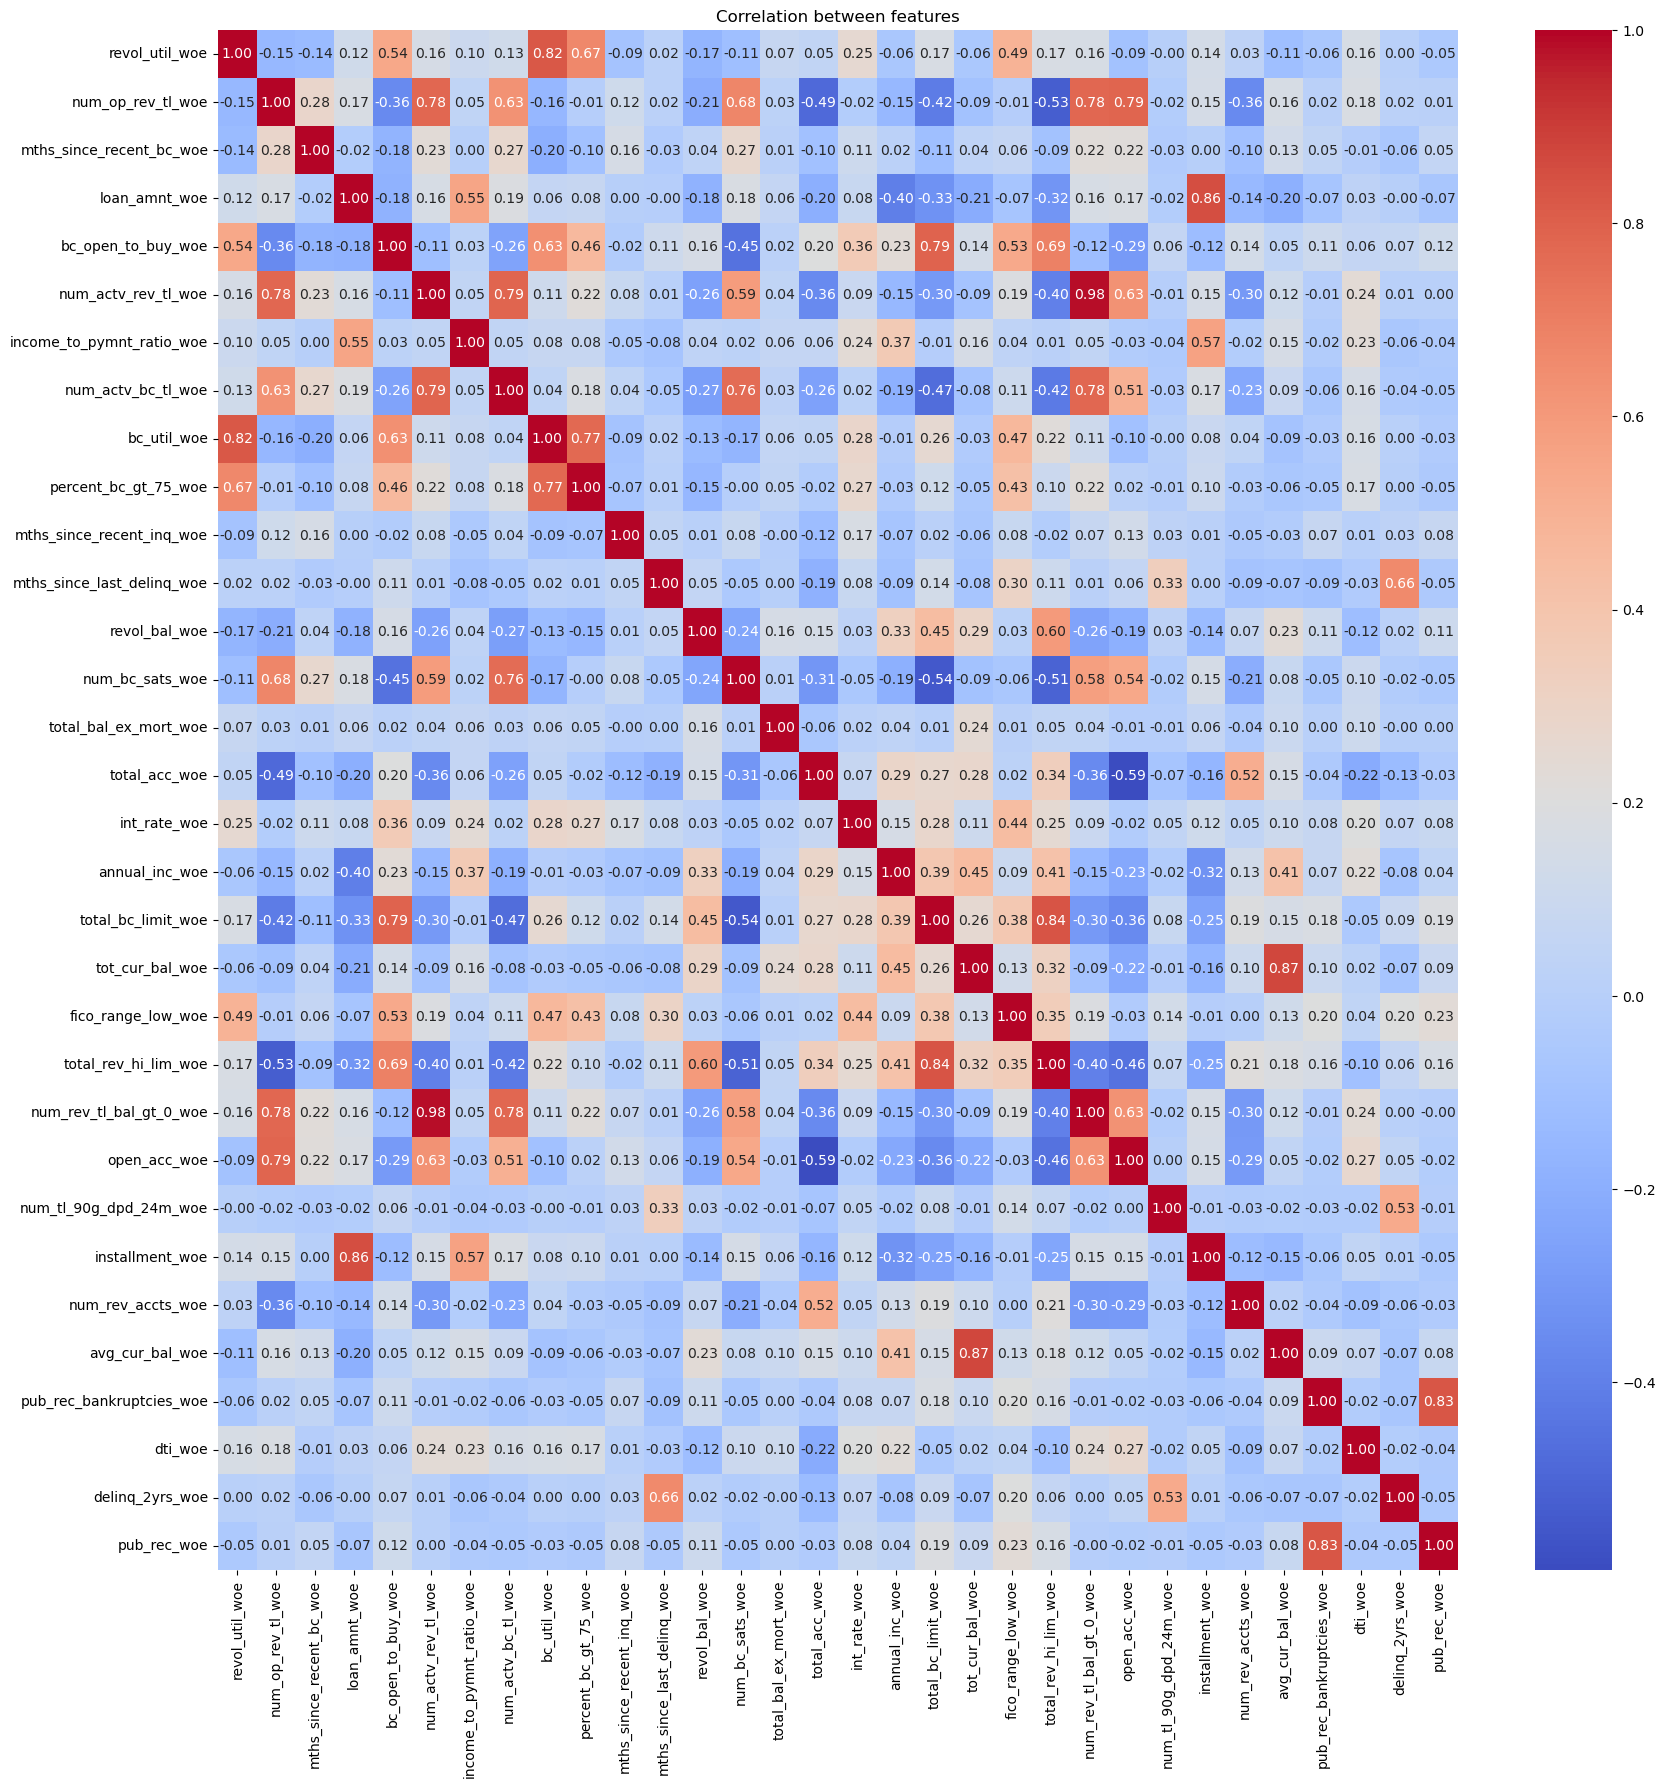

In [ ]:
# see the correlation between features
corr = x_train_woe.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation between features')
plt.show()

# PCA

From the correlation plot, we can see that there are some variables which have significant linear relationship with other variables.<br>
This will cause some problem to model fitting.<br>
At the same time, too many variables will cause high computational cost. Considering our device can not handle such large-scale data, we use PCA to reduce dimensionality.

In [ ]:
# for grade and emp_length, we can first standardize them
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_final[['grade','emp_length']] = scaler.fit_transform(x_train_final[['grade','emp_length']])
x_test_final[['grade','emp_length']] = scaler.transform(x_test_final[['grade','emp_length']])
x_val_final[['grade','emp_length']] = scaler.transform(x_val_final[['grade','emp_length']])
# for categorical features, use one-hot encoding
x_train_final = pd.get_dummies(x_train_final, drop_first=True)
x_test_final = pd.get_dummies(x_test_final, drop_first=True)
x_val_final = pd.get_dummies(x_val_final, drop_first=True)

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train_final)
x_test_pca = pca.transform(x_test_final)
x_val_pca = pca.transform(x_val_final)
x_train_pca = pd.DataFrame(x_train_pca, columns=[f'PC{i+1}' for i in range(x_train_pca.shape[1])])
x_test_pca = pd.DataFrame(x_test_pca, columns=[f'PC{i+1}' for i in range(x_test_pca.shape[1])])
x_val_pca = pd.DataFrame(x_val_pca, columns=[f'PC{i+1}' for i in range(x_val_pca.shape[1])])
# check the explained variance ratio
pca_df = pd.DataFrame(pca.explained_variance_, columns=['explained_variance'])
pca_df['explained_variance_ratio'] = pca.explained_variance_ratio_
pca_df['cumulative_explained_variance'] = pca_df['explained_variance_ratio'].cumsum()
pca_df['principal_component'] = [f'PC{i+1}' for i in range(pca_df.shape[0])]
pca_df = pca_df.sort_values(by='explained_variance', ascending=False)
pca_df = pca_df.reset_index(drop=True)
pca_df['explained_variance'] = pca_df['explained_variance'].round(4)
pca_df['explained_variance_ratio'] = pca_df['explained_variance_ratio'].round(4)
pca_df['cumulative_explained_variance'] = pca_df['cumulative_explained_variance'].round(4)

In [ ]:
pca_df

explained_variance  explained_variance_ratio  \
0               1.5906                    0.3049   
1               1.0365                    0.1987   
2               0.4568                    0.0875   
3               0.3359                    0.0644   
4               0.2743                    0.0526   
5               0.2346                    0.0450   
6               0.1743                    0.0334   
7               0.1524                    0.0292   
8               0.1306                    0.0250   
9               0.1115                    0.0214   
10              0.0993                    0.0190   
11              0.0902                    0.0173   
12              0.0672                    0.0129   
13              0.0651                    0.0125   
14              0.0591                    0.0113   
15              0.0586                    0.0112   
16              0.0508                    0.0097   

    cumulative_explained_variance principal_component  
0                          0.3049                 PC1  
1                          0.5035                 PC2  
2                          0.5911                 PC3  
3                          0.6554                 PC4  
4                          0.7080                 PC5  
5                          0.7530                 PC6  
6                          0.7864                 PC7  
7                          0.8156                 PC8  
8                          0.8406                 PC9  
9                          0.8620                PC10  
10                         0.8810                PC11  
11                         0.8983                PC12  
12                         0.9112                PC13  
13                         0.9237                PC14  
14                         0.9350                PC15  
15                         0.9462                PC16  
16                         0.9560                PC17

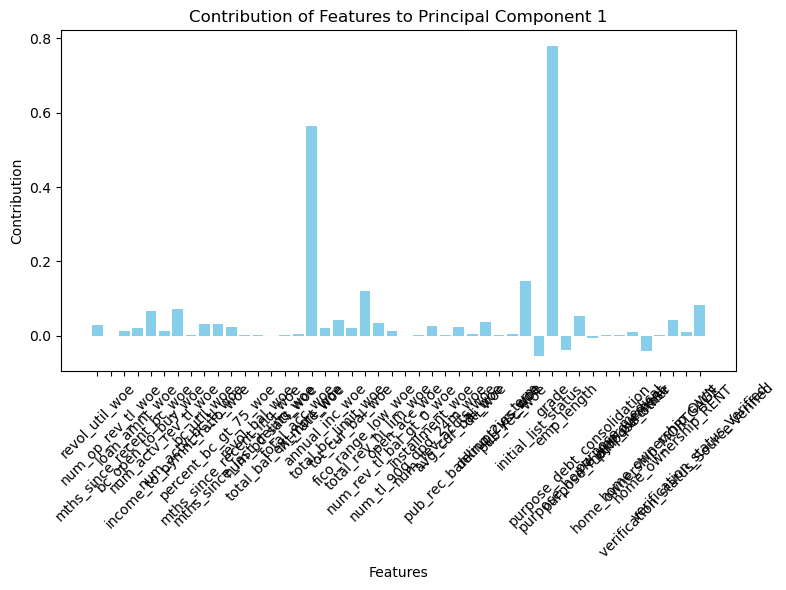

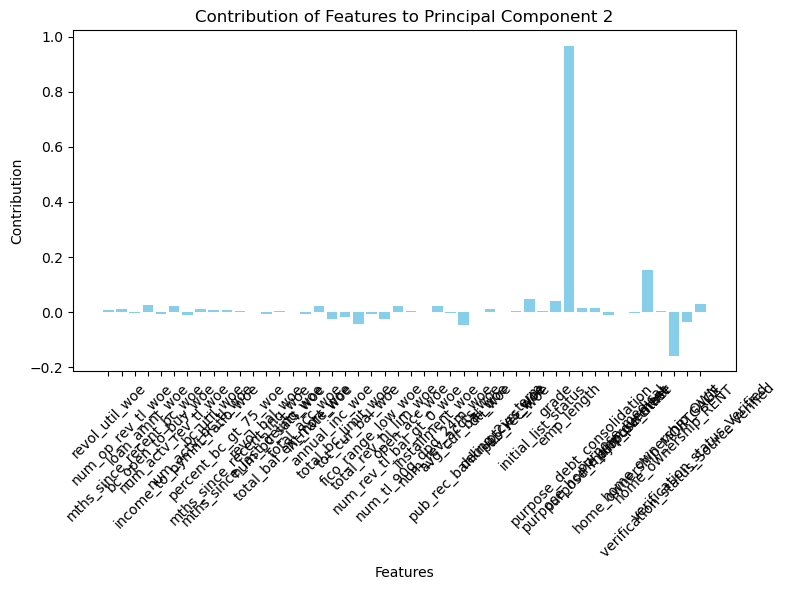

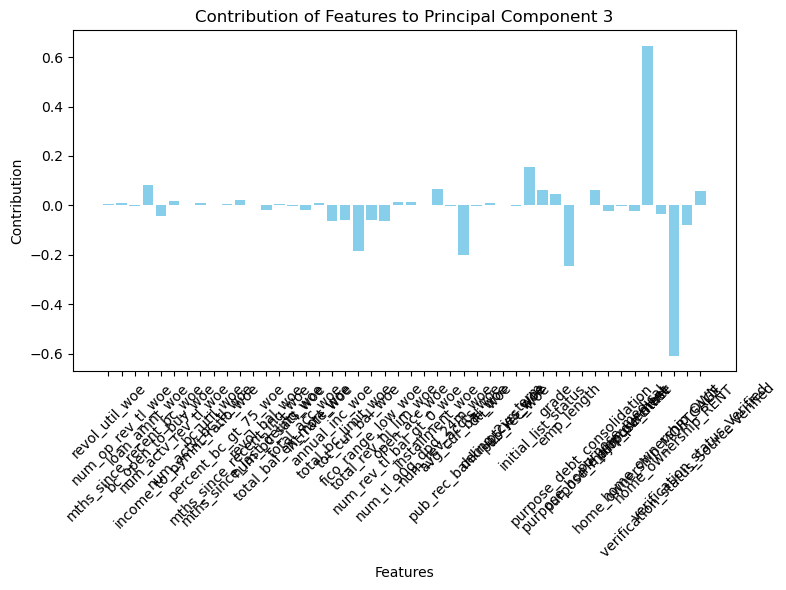

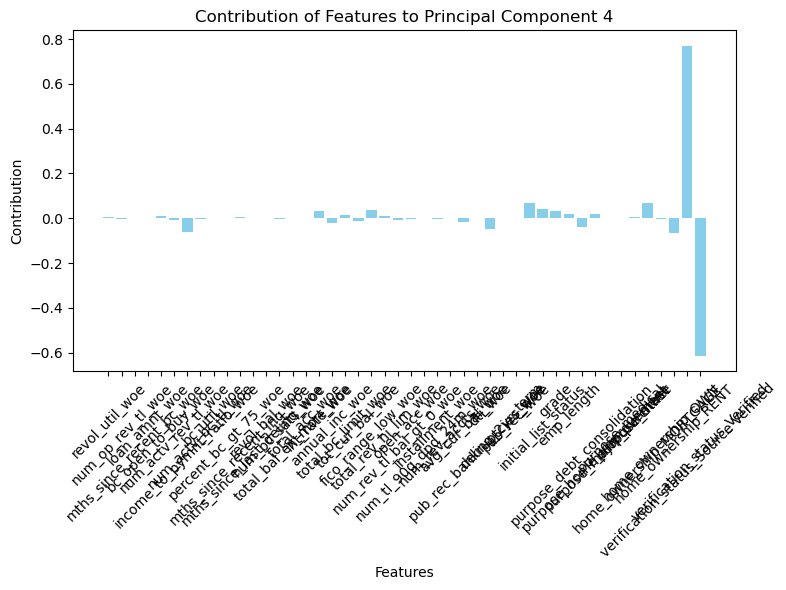

In [ ]:
components = pca.components_  # 主成分
feature_names = x_train_final.columns.to_list()  # 特征名称
for i in range(4):  # 遍历前 4 个主成分
    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, components[i], color='skyblue')
    plt.title(f"Contribution of Features to Principal Component {i+1}")
    plt.xlabel("Features")
    plt.ylabel("Contribution")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Sampling Method

## Under-Sampling

In [ ]:
# tomek-links
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='majority')
x_train_tl, y_train_tl = tl.fit_resample(x_train_pca, y_train)
x_train_tl.reset_index(drop=True, inplace=True)
y_train_tl.reset_index(drop=True, inplace=True)
y_train_tl.value_counts()

loan_status
0    788619
1    219744
Name: count, dtype: int64

## Over-Sampling

In [ ]:
# borderline-smote
from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE(sampling_strategy='minority', k_neighbors=5)
x_train_bsmote, y_train_bsmote = bsmote.fit_resample(x_train_pca, y_train)
x_train_bsmote.reset_index(drop=True, inplace=True)
y_train_bsmote.reset_index(drop=True, inplace=True)
y_train_bsmote.value_counts()

loan_status
0    867180
1    867180
Name: count, dtype: int64

## Hybrid-Sampling

In [ ]:
# smote-enn
from imblearn.combine import SMOTEENN
se = SMOTEENN(sampling_strategy='minority', random_state=42)
x_train_se, y_train_se = se.fit_resample(x_train_pca, y_train)
x_train_se.reset_index(drop=True, inplace=True)
y_train_se.reset_index(drop=True, inplace=True)
y_train_se.value_counts()

loan_status
1    713268
0    419843
Name: count, dtype: int64

# Model Construction

This is function to find best threshold for different models.<br>
The criteria is to maximize f1-score.

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
thresholds = np.linspace(0.01, 1, 100)

### The original dataset

We will compare results of all the sample methods and original dataset.

Best parameters:  {'solver': 'liblinear', 'penalty': 'l2', 'class_weight': {0: 1, 1: 2.4299999999999997}, 'C': 7.36}
Best threshold:  0.4
Accuracy: 0.6645
Precision: 0.3269
Recall: 0.6260
F1 score: 0.4295


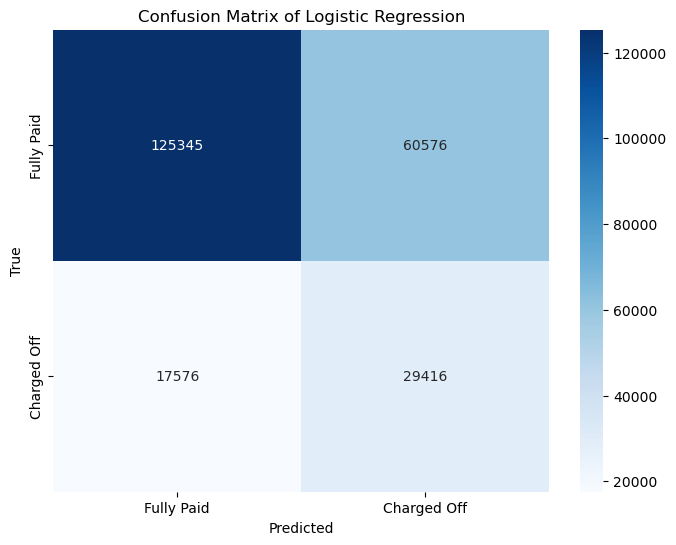

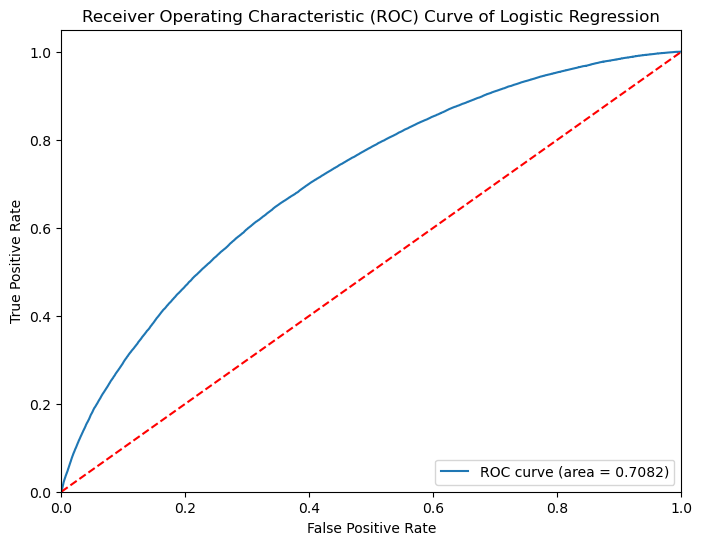

In [ ]:
# fit logistic regression model
param_grid_lr = {
    'penalty':['l1','l2'],
    'C':np.linspace(0.01,10,1000),
    'solver':['liblinear'],
    'class_weight':[{0:1,1:n} for n in np.linspace(0.01,10,1000)]
}
lr = LogisticRegression(max_iter=1000, random_state=42)
random_lr = RandomizedSearchCV(lr, param_grid_lr, n_iter=100, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
random_lr.fit(x_train_pca, y_train)
best_params_lr = random_lr.best_params_
best_lr = random_lr.best_estimator_
print('Best parameters: ', best_params_lr)
# find for the best threshold
f1_scores_lr = []
for threshold in thresholds:
    y_val_pred_proba_lr = best_lr.predict_proba(x_val_pca)[:, 1]
    y_val_pred_lr = (y_val_pred_proba_lr >= threshold).astype(int)
    f1_scores_lr.append(f1_score(y_val, y_val_pred_lr))
best_threshold_lr = thresholds[np.argmax(f1_scores_lr)]
print('Best threshold: ', best_threshold_lr)
# fit logistic regression model with best parameters
y_pred_proba_lr = best_lr.predict_proba(x_test_pca)[:, 1]
y_pred_lr = (y_pred_proba_lr >= best_threshold_lr).astype(int)
# calculate metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
# print metrics
print(f'Accuracy: {accuracy_lr:.4f}')   
print(f'Precision: {precision_lr:.4f}')
print(f'Recall: {recall_lr:.4f}')
print(f'F1 score: {f1_lr:.4f}')
# confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.yticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.show()
# roc curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='ROC curve (area = {:.4f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Logistic Regression')
plt.legend(loc='lower right')
plt.show()


### Tomek-Links dataset

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters:  {'solver': 'liblinear', 'penalty': 'l1', 'class_weight': {0: 1, 1: 3.28}, 'C': 0.43}
Best threshold:  0.51
Accuracy: 0.6697
Precision: 0.3296
Recall: 0.6160
F1 score: 0.4294


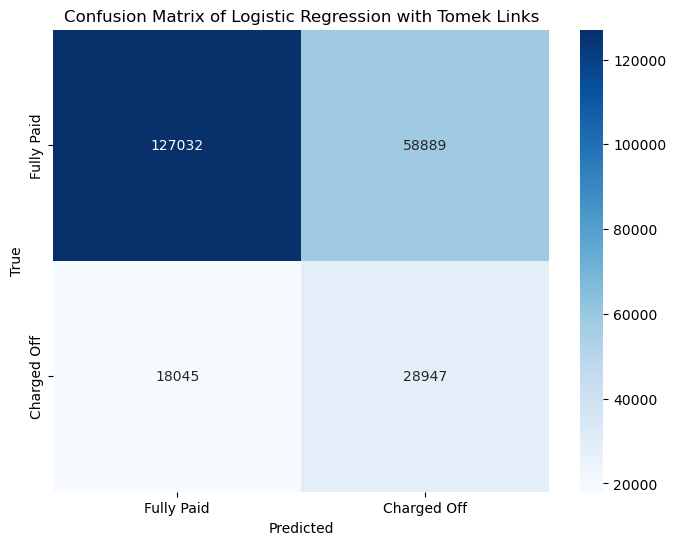

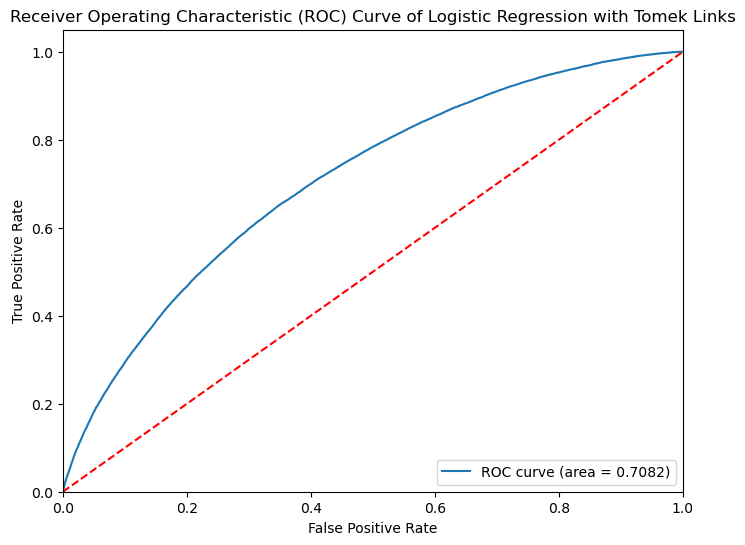

In [ ]:
# fit logistic regression model with tomek-links
lr_tl = LogisticRegression(max_iter=1000, random_state=42)
random_lr_tl = RandomizedSearchCV(lr_tl, param_grid_lr, n_iter=100, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
random_lr_tl.fit(x_train_tl, y_train_tl)
best_params_lr_tl = random_lr_tl.best_params_
best_lr_tl = random_lr_tl.best_estimator_
print('Best parameters: ', best_params_lr_tl)
# find for the best threshold
f1_scores_lr_tl = []
for threshold in thresholds:
    y_val_pred_proba_lr_tl = best_lr_tl.predict_proba(x_val_pca)[:, 1]
    y_val_pred_lr_tl = (y_val_pred_proba_lr_tl >= threshold).astype(int)
    f1_scores_lr_tl.append(f1_score(y_val, y_val_pred_lr_tl))
best_threshold_lr_tl = thresholds[np.argmax(f1_scores_lr_tl)]
print('Best threshold: ', best_threshold_lr_tl)
# fit logistic regression model with best parameters
y_pred_proba_lr_tl = best_lr_tl.predict_proba(x_test_pca)[:, 1]
y_pred_lr_tl = (y_pred_proba_lr_tl >= best_threshold_lr_tl).astype(int)
# calculate metrics
accuracy_lr_tl = accuracy_score(y_test, y_pred_lr_tl)
precision_lr_tl = precision_score(y_test, y_pred_lr_tl)
recall_lr_tl = recall_score(y_test, y_pred_lr_tl)
f1_lr_tl = f1_score(y_test, y_pred_lr_tl)
roc_auc_lr_tl = roc_auc_score(y_test, y_pred_proba_lr_tl)
# print metrics
print(f'Accuracy: {accuracy_lr_tl:.4f}')
print(f'Precision: {precision_lr_tl:.4f}')
print(f'Recall: {recall_lr_tl:.4f}')
print(f'F1 score: {f1_lr_tl:.4f}')
# confusion matrix
cm_lr_tl = confusion_matrix(y_test, y_pred_lr_tl)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_tl, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Logistic Regression with Tomek Links')   
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.yticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.show()
# roc curve
fpr_lr_tl, tpr_lr_tl, thresholds_lr_tl = roc_curve(y_test, y_pred_proba_lr_tl)
roc_auc_lr_tl = auc(fpr_lr_tl, tpr_lr_tl)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_tl, tpr_lr_tl, label='ROC curve (area = {:.4f})'.format(roc_auc_lr_tl))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Logistic Regression with Tomek Links')
plt.legend(loc='lower right')
plt.show()

### Borderline-SMOTE Dataset

Best parameters:  {'solver': 'liblinear', 'penalty': 'l1', 'class_weight': {0: 1, 1: 0.38}, 'C': 5.6899999999999995}
Best threshold:  0.31
Accuracy: 0.6805
Precision: 0.3351
Recall: 0.5928
F1 score: 0.4281


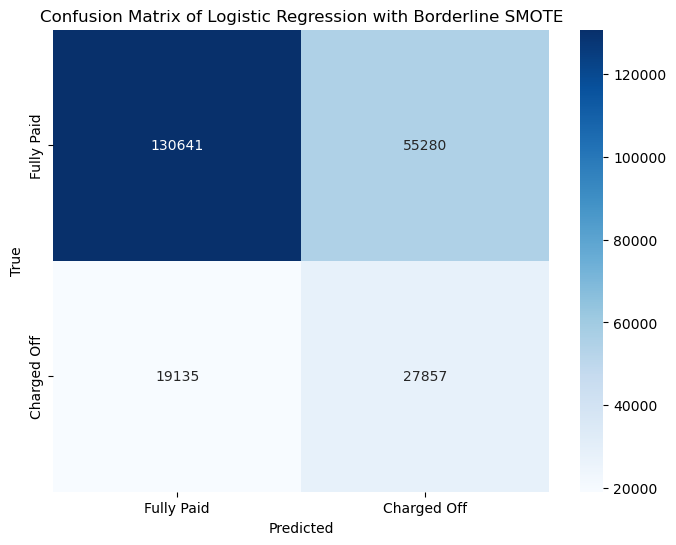

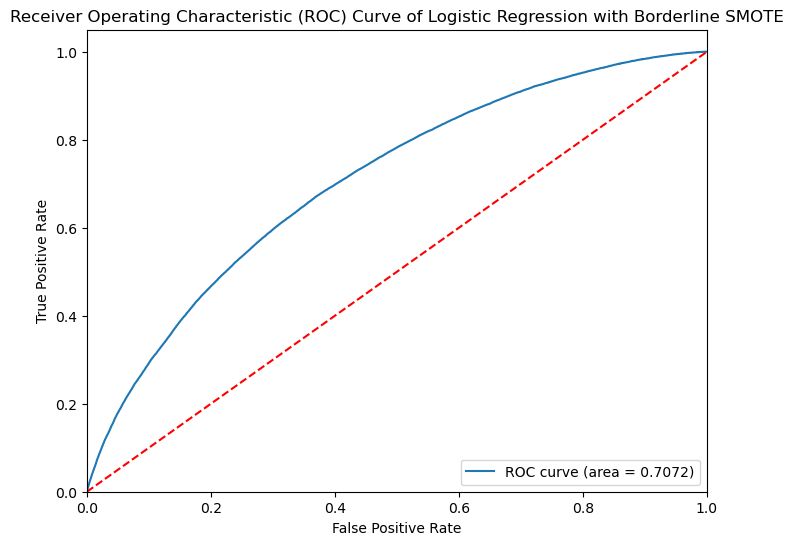

In [ ]:
lr_bs = LogisticRegression(max_iter=1000, random_state=42)
random_lr_bs = RandomizedSearchCV(lr_bs, param_grid_lr, n_iter=100, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
random_lr_bs.fit(x_train_bsmote, y_train_bsmote)
best_params_lr_bs = random_lr_bs.best_params_
best_lr_bs = random_lr_bs.best_estimator_
print('Best parameters: ', best_params_lr_bs)
# find for the best threshold
f1_scores_lr_bs = []
for threshold in thresholds:
    y_val_pred_proba_lr_bs = best_lr_bs.predict_proba(x_val_pca)[:, 1]
    y_val_pred_lr_bs = (y_val_pred_proba_lr_bs >= threshold).astype(int)
    f1_scores_lr_bs.append(f1_score(y_val, y_val_pred_lr_bs))
best_threshold_lr_bs = thresholds[np.argmax(f1_scores_lr_bs)]
print('Best threshold: ', best_threshold_lr_bs)
# fit logistic regression model with best parameters
y_pred_proba_lr_bs = best_lr_bs.predict_proba(x_test_pca)[:, 1]
y_pred_lr_bs = (y_pred_proba_lr_bs >= best_threshold_lr_bs).astype(int)
# calculate metrics
accuracy_lr_bs = accuracy_score(y_test, y_pred_lr_bs)
precision_lr_bs = precision_score(y_test, y_pred_lr_bs)
recall_lr_bs = recall_score(y_test, y_pred_lr_bs)
f1_lr_bs = f1_score(y_test, y_pred_lr_bs)
roc_auc_lr_bs = roc_auc_score(y_test, y_pred_proba_lr_bs)
# print metrics
print(f'Accuracy: {accuracy_lr_bs:.4f}')
print(f'Precision: {precision_lr_bs:.4f}')
print(f'Recall: {recall_lr_bs:.4f}')
print(f'F1 score: {f1_lr_bs:.4f}')
# confusion matrix
cm_lr_bs = confusion_matrix(y_test, y_pred_lr_bs)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_bs, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Logistic Regression with Borderline SMOTE')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.yticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.show()
# roc curve
fpr_lr_bs, tpr_lr_bs, thresholds_lr_bs = roc_curve(y_test, y_pred_proba_lr_bs)
roc_auc_lr_bs = auc(fpr_lr_bs, tpr_lr_bs)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_bs, tpr_lr_bs, label='ROC curve (area = {:.4f})'.format(roc_auc_lr_bs))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Logistic Regression with Borderline SMOTE')
plt.legend(loc='lower right')
plt.show()

### SmoteENN Dataset

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters:  {'solver': 'liblinear', 'penalty': 'l2', 'class_weight': {0: 1, 1: 1.03}, 'C': 6.45}
Best threshold:  0.72
Accuracy: 0.6662
Precision: 0.3280
Recall: 0.6237
F1 score: 0.4299


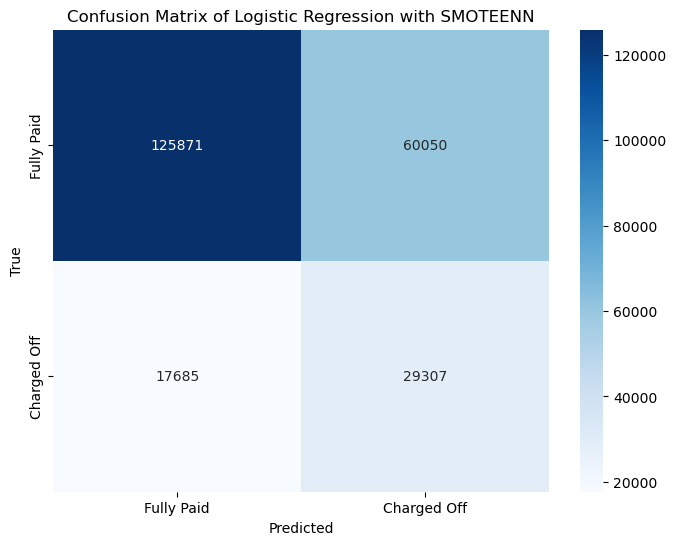

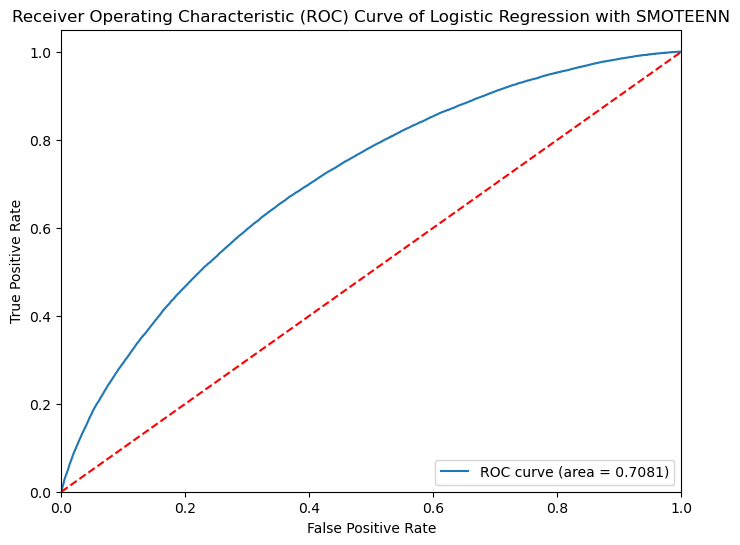

In [ ]:
lr_se = LogisticRegression(max_iter=1000, random_state=42)
random_lr_se = RandomizedSearchCV(lr_se, param_grid_lr, n_iter=100, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
random_lr_se.fit(x_train_se, y_train_se)
best_params_lr_se = random_lr_se.best_params_
best_lr_se = random_lr_se.best_estimator_
print('Best parameters: ', best_params_lr_se)
# find for the best threshold
f1_scores_lr_se = []
for threshold in thresholds:
    y_val_pred_proba_lr_se = best_lr_se.predict_proba(x_val_pca)[:, 1]
    y_val_pred_lr_se = (y_val_pred_proba_lr_se >= threshold).astype(int)
    f1_scores_lr_se.append(f1_score(y_val, y_val_pred_lr_se))
best_threshold_lr_se = thresholds[np.argmax(f1_scores_lr_se)]
print('Best threshold: ', best_threshold_lr_se)
# fit logistic regression model with best parameters
y_pred_proba_lr_se = best_lr_se.predict_proba(x_test_pca)[:, 1]
y_pred_lr_se = (y_pred_proba_lr_se >= best_threshold_lr_se).astype(int)
# calculate metrics
accuracy_lr_se = accuracy_score(y_test, y_pred_lr_se)
precision_lr_se = precision_score(y_test, y_pred_lr_se)
recall_lr_se = recall_score(y_test, y_pred_lr_se)
f1_lr_se = f1_score(y_test, y_pred_lr_se)
roc_auc_lr_se = roc_auc_score(y_test, y_pred_proba_lr_se)
# print metrics
print(f'Accuracy: {accuracy_lr_se:.4f}')
print(f'Precision: {precision_lr_se:.4f}')
print(f'Recall: {recall_lr_se:.4f}')
print(f'F1 score: {f1_lr_se:.4f}')
# confusion matrix
cm_lr_se = confusion_matrix(y_test, y_pred_lr_se)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_se, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Logistic Regression with SMOTEENN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.yticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.show()
# roc curve
fpr_lr_se, tpr_lr_se, thresholds_lr_se = roc_curve(y_test, y_pred_proba_lr_se)
roc_auc_lr_se = auc(fpr_lr_se, tpr_lr_se)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_se, tpr_lr_se, label='ROC curve (area = {:.4f})'.format(roc_auc_lr_se))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Logistic Regression with SMOTEENN')
plt.legend(loc='lower right')
plt.show()

## XGBoost

### Original Dataset

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters:  {'subsample': 0.9299999999999999, 'scale_pos_weight': 2.4000000000000004, 'reg_lambda': 5.9, 'n_estimators': 500, 'min_child_weight': 4.7, 'max_depth': 9, 'learning_rate': 0.008530000000000001, 'gamma': 0.36000000000000004, 'colsample_bytree': 0.69}
Best threshold:  0.39
Accuracy: 0.6596
Precision: 0.3257
Recall: 0.6422
F1 score: 0.4322


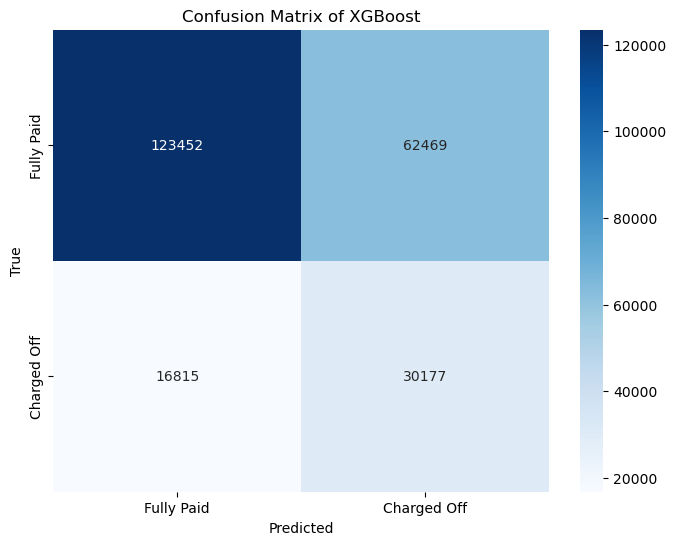

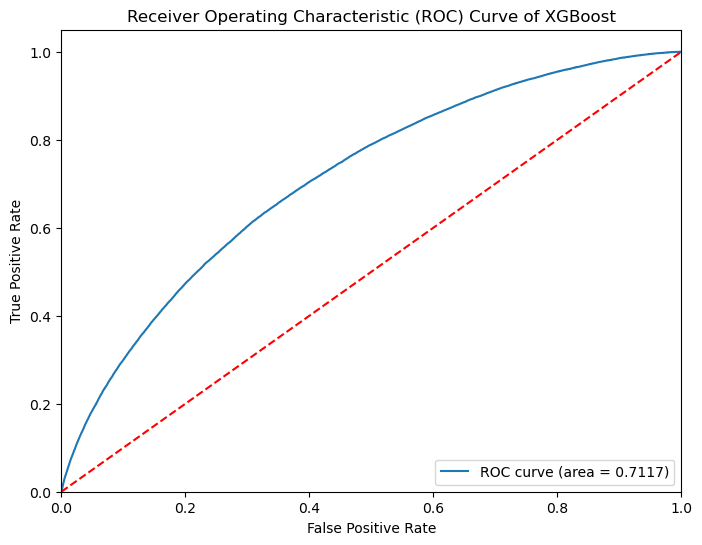

In [215]:
# fit xgboost model
param_grid_xgb = {
    'n_estimators':[20,50,80,100,200,300,400,500],
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    'learning_rate':np.linspace(0.00001, 0.01, 1000),
    'subsample':np.linspace(0.51,1,50),
    'colsample_bytree':np.linspace(0.51,1,50),
    'gamma':np.linspace(0.01,0.5,50),
    'reg_lambda':np.linspace(0.1,10,100),
    'min_child_weight':np.linspace(0.1,10,100),
    'scale_pos_weight':np.linspace(0.1,10,100)
}
xgbb = xgb.XGBClassifier(random_state=42, n_jobs=-1, objective='binary:logistic')
random_xgb = RandomizedSearchCV(xgbb, param_grid_xgb, n_iter=100, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
random_xgb.fit(x_train_pca, y_train)
best_params_xgb = random_xgb.best_params_
best_xgb = random_xgb.best_estimator_
print('Best parameters: ', best_params_xgb)
# find for the best threshold
f1_scores_xgb = []
for threshold in thresholds:
    y_val_pred_proba_xgb = best_xgb.predict_proba(x_val_pca)[:, 1]
    y_val_pred_xgb = (y_val_pred_proba_xgb >= threshold).astype(int)
    f1_scores_xgb.append(f1_score(y_val, y_val_pred_xgb))
best_threshold_xgb = thresholds[np.argmax(f1_scores_xgb)]
print('Best threshold: ', best_threshold_xgb)
# fit xgboost model with best parameters
y_pred_proba_xgb = best_xgb.predict_proba(x_test_pca)[:, 1]
y_pred_xgb = (y_pred_proba_xgb >= best_threshold_xgb).astype(int)
# calculate metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
# print metrics
print(f'Accuracy: {accuracy_xgb:.4f}')
print(f'Precision: {precision_xgb:.4f}')
print(f'Recall: {recall_xgb:.4f}')
print(f'F1 score: {f1_xgb:.4f}')
# confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.yticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.show()
# roc curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label='ROC curve (area = {:.4f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of XGBoost')
plt.legend(loc='lower right')
plt.show()

### Tomek-Links Dataset

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters:  {'subsample': 0.77, 'scale_pos_weight': 0.2, 'reg_lambda': 0.30000000000000004, 'n_estimators': 500, 'min_child_weight': 2.4000000000000004, 'max_depth': 14, 'learning_rate': 0.0038400000000000005, 'gamma': 0.02, 'colsample_bytree': 0.73}
Best threshold:  0.06999999999999999
Accuracy: 0.6477
Precision: 0.3194
Recall: 0.6602
F1 score: 0.4305


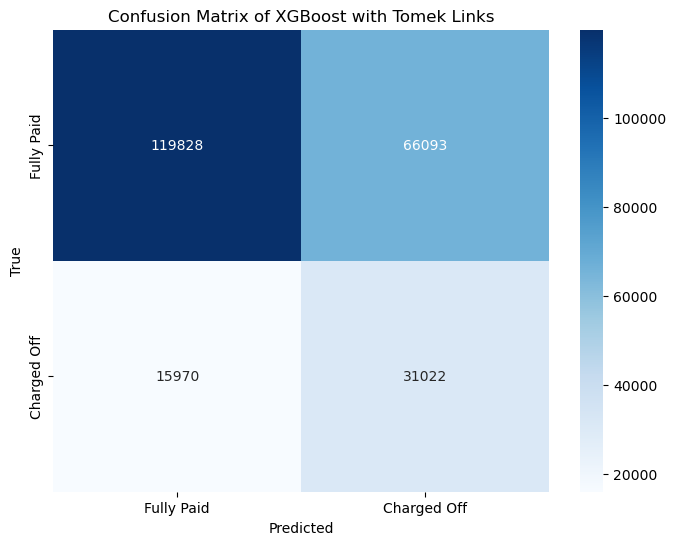

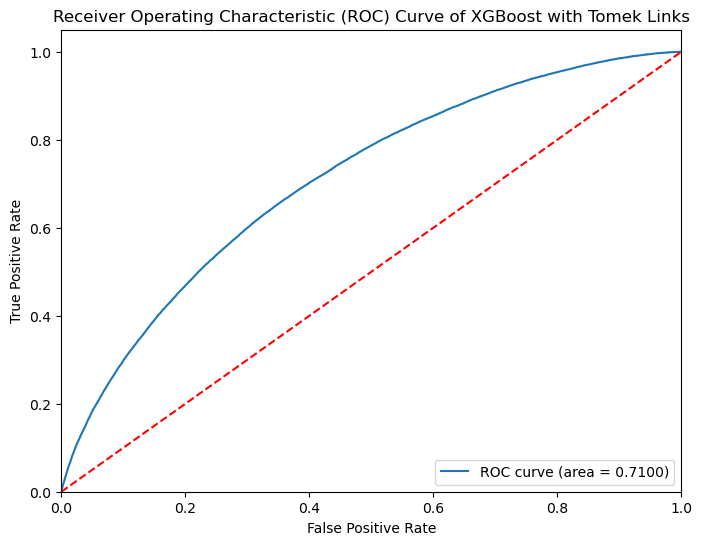

In [217]:
xgb_tl = xgb.XGBClassifier(random_state=42, n_jobs=-1, objective='binary:logistic')
random_xgb_tl = RandomizedSearchCV(xgb_tl, param_grid_xgb, n_iter=100, cv=5, scoring='roc_auc', random_state=45, n_jobs=-1)
random_xgb_tl.fit(x_train_tl, y_train_tl)
best_params_xgb_tl = random_xgb_tl.best_params_
best_xgb_tl = random_xgb_tl.best_estimator_
print('Best parameters: ', best_params_xgb_tl)
# find for the best threshold
f1_scores_xgb_tl = []
for threshold in thresholds:
    y_val_pred_proba_xgb_tl = best_xgb_tl.predict_proba(x_val_pca)[:, 1]
    y_val_pred_xgb_tl = (y_val_pred_proba_xgb_tl >= threshold).astype(int)
    f1_scores_xgb_tl.append(f1_score(y_val, y_val_pred_xgb_tl))
best_threshold_xgb_tl = thresholds[np.argmax(f1_scores_xgb_tl)]
print('Best threshold: ', best_threshold_xgb_tl)
# fit xgboost model with best parameters
y_pred_proba_xgb_tl = best_xgb_tl.predict_proba(x_test_pca)[:, 1]
y_pred_xgb_tl = (y_pred_proba_xgb_tl >= best_threshold_xgb_tl).astype(int)
# calculate metrics
accuracy_xgb_tl = accuracy_score(y_test, y_pred_xgb_tl)
precision_xgb_tl = precision_score(y_test, y_pred_xgb_tl)
recall_xgb_tl = recall_score(y_test, y_pred_xgb_tl)
f1_xgb_tl = f1_score(y_test, y_pred_xgb_tl)
roc_auc_xgb_tl = roc_auc_score(y_test, y_pred_proba_xgb_tl)
# print metrics
print(f'Accuracy: {accuracy_xgb_tl:.4f}')
print(f'Precision: {precision_xgb_tl:.4f}')
print(f'Recall: {recall_xgb_tl:.4f}')
print(f'F1 score: {f1_xgb_tl:.4f}')
# confusion matrix
cm_xgb_tl = confusion_matrix(y_test, y_pred_xgb_tl)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_tl, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of XGBoost with Tomek Links')
plt.xlabel('Predicted')
plt.ylabel('True')  
plt.xticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.yticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.show()
# roc curve
fpr_xgb_tl, tpr_xgb_tl, thresholds_xgb_tl = roc_curve(y_test, y_pred_proba_xgb_tl)
roc_auc_xgb_tl = auc(fpr_xgb_tl, tpr_xgb_tl)
plt.figure(figsize=(8, 6))  
plt.plot(fpr_xgb_tl, tpr_xgb_tl, label='ROC curve (area = {:.4f})'.format(roc_auc_xgb_tl))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of XGBoost with Tomek Links')
plt.legend(loc='lower right')
plt.show()

### Borderline-SMOTE Dataset

Best parameters:  {'subsample': 0.56, 'scale_pos_weight': 2.7, 'reg_lambda': 0.9, 'n_estimators': 500, 'min_child_weight': 3.8000000000000003, 'max_depth': 13, 'learning_rate': 0.00674, 'gamma': 0.34, 'colsample_bytree': 0.66}
Best threshold:  0.73
Accuracy: 0.6606
Precision: 0.3215
Recall: 0.6143
F1 score: 0.4221


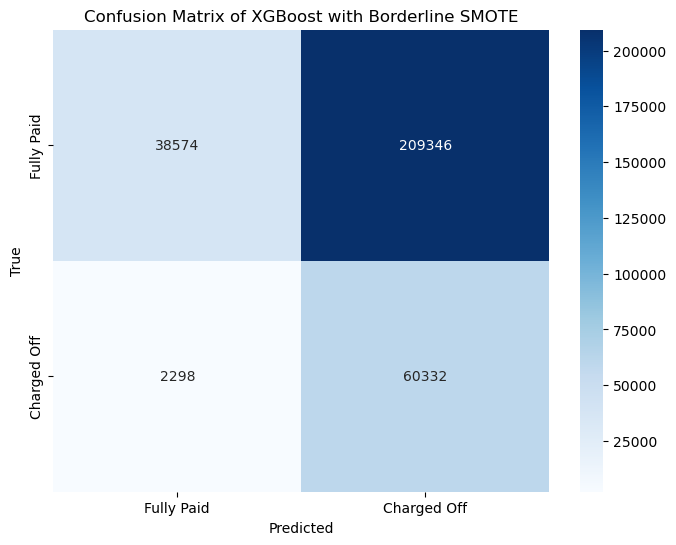

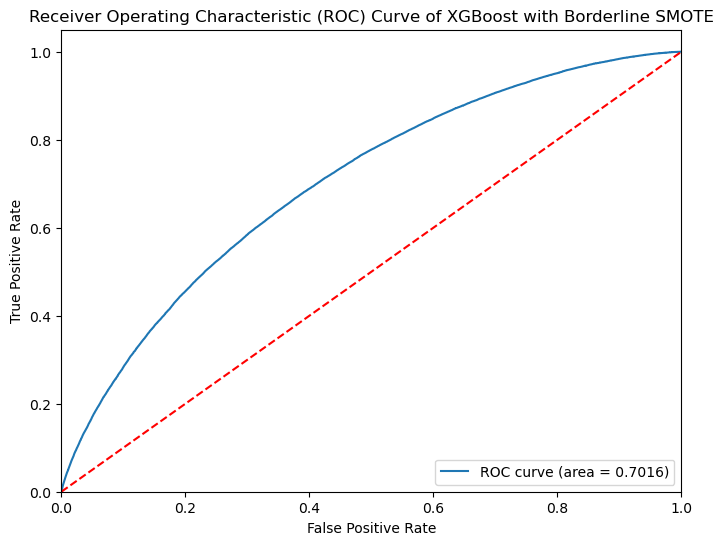

In [218]:
xgb_bs = xgb.XGBClassifier(random_state=42, n_jobs=-1, objective='binary:logistic')
random_xgb_bs = RandomizedSearchCV(xgb_bs, param_grid_xgb, n_iter=100, cv=5, scoring='roc_auc', random_state=123, n_jobs=-1)
random_xgb_bs.fit(x_train_bsmote, y_train_bsmote)
best_params_xgb_bs = random_xgb_bs.best_params_
best_xgb_bs = random_xgb_bs.best_estimator_
print('Best parameters: ', best_params_xgb_bs)
# find for the best threshold
f1_scores_xgb_bs = []
for threshold in thresholds:
    y_val_pred_proba_xgb_bs = best_xgb_bs.predict_proba(x_val_pca)[:, 1]
    y_val_pred_xgb_bs = (y_val_pred_proba_xgb_bs >= threshold).astype(int)
    f1_scores_xgb_bs.append(f1_score(y_val, y_val_pred_xgb_bs))
best_threshold_xgb_bs = thresholds[np.argmax(f1_scores_xgb_bs)]
print('Best threshold: ', best_threshold_xgb_bs)
# fit xgboost model with best parameters
y_pred_proba_xgb_bs = best_xgb_bs.predict_proba(x_test_pca)[:, 1]
y_pred_xgb_bs = (y_pred_proba_xgb_bs >= best_threshold_xgb_bs).astype(int)
# calculate metrics
accuracy_xgb_bs = accuracy_score(y_test, y_pred_xgb_bs)
precision_xgb_bs = precision_score(y_test, y_pred_xgb_bs)
recall_xgb_bs = recall_score(y_test, y_pred_xgb_bs)
f1_xgb_bs = f1_score(y_test, y_pred_xgb_bs)
roc_auc_xgb_bs = roc_auc_score(y_test, y_pred_proba_xgb_bs)
# print metrics
print(f'Accuracy: {accuracy_xgb_bs:.4f}')
print(f'Precision: {precision_xgb_bs:.4f}')
print(f'Recall: {recall_xgb_bs:.4f}')
print(f'F1 score: {f1_xgb_bs:.4f}')
# confusion matrix
cm_xgb_bs = confusion_matrix(y_test, y_pred_xgb_bs)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_adasyn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of XGBoost with Borderline SMOTE')  
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])  
plt.yticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.show()
# roc curve
fpr_xgb_bs, tpr_xgb_bs, thresholds_xgb_bs = roc_curve(y_test, y_pred_proba_xgb_bs)
roc_auc_xgb_bs = auc(fpr_xgb_bs, tpr_xgb_bs)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_bs, tpr_xgb_bs, label='ROC curve (area = {:.4f})'.format(roc_auc_xgb_bs))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of XGBoost with Borderline SMOTE') 
plt.legend(loc='lower right')
plt.show()

### SmoteENN Dataset

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters:  {'subsample': 0.95, 'scale_pos_weight': 9.2, 'reg_lambda': 2.1, 'n_estimators': 500, 'min_child_weight': 6.4, 'max_depth': 14, 'learning_rate': 0.00842, 'gamma': 0.48000000000000004, 'colsample_bytree': 0.99}
Best threshold:  0.93
Accuracy: 0.6458
Precision: 0.3141
Recall: 0.6382
F1 score: 0.4210


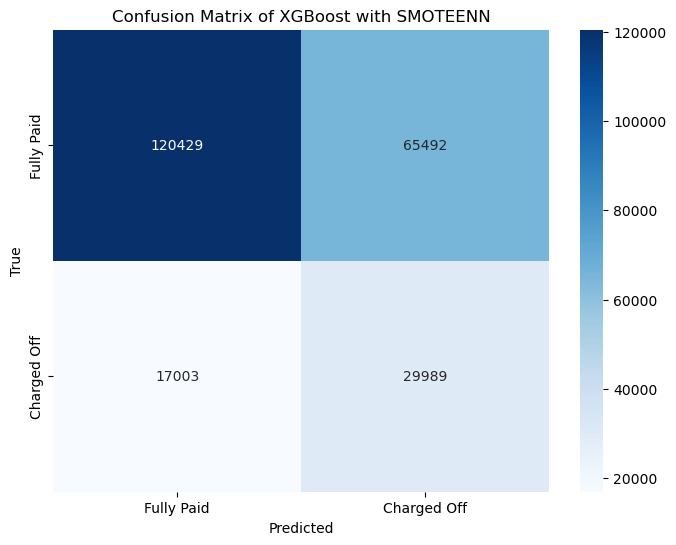

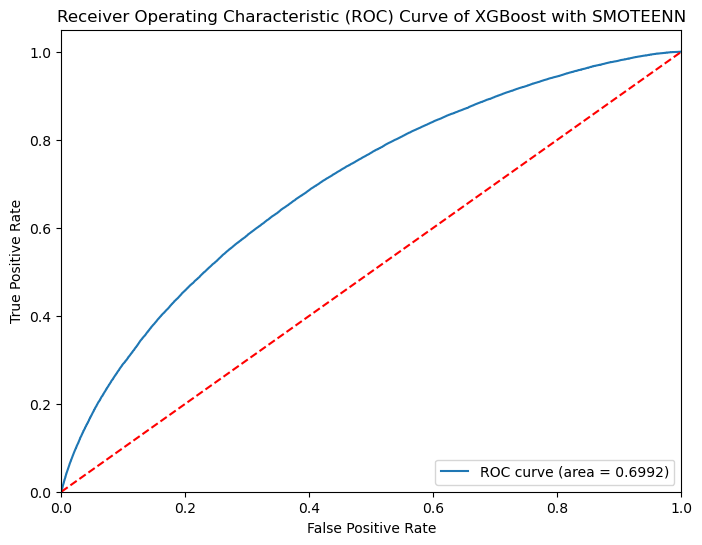

In [219]:
xgb_se = xgb.XGBClassifier(random_state=42, n_jobs=-1, objective='binary:logistic')
random_xgb_se = RandomizedSearchCV(xgb_se, param_grid_xgb, n_iter=100, cv=5, scoring='roc_auc', random_state=0, n_jobs=-1)
random_xgb_se.fit(x_train_se, y_train_se)
best_params_xgb_se = random_xgb_se.best_params_
best_xgb_se = random_xgb_se.best_estimator_
print('Best parameters: ', best_params_xgb_se)
# find for the best threshold
f1_scores_xgb_se = []
for threshold in thresholds:
    y_val_pred_proba_xgb_se = best_xgb_se.predict_proba(x_val_pca)[:, 1]
    y_val_pred_xgb_se = (y_val_pred_proba_xgb_se >= threshold).astype(int)
    f1_scores_xgb_se.append(f1_score(y_val, y_val_pred_xgb_se))
best_threshold_xgb_se = thresholds[np.argmax(f1_scores_xgb_se)]
print('Best threshold: ', best_threshold_xgb_se)
# fit xgboost model with best parameters
y_pred_proba_xgb_se = best_xgb_se.predict_proba(x_test_pca)[:, 1]
y_pred_xgb_se = (y_pred_proba_xgb_se >= best_threshold_xgb_se).astype(int)
# calculate metrics
accuracy_xgb_se = accuracy_score(y_test, y_pred_xgb_se)
precision_xgb_se = precision_score(y_test, y_pred_xgb_se)
recall_xgb_se = recall_score(y_test, y_pred_xgb_se)
f1_xgb_se = f1_score(y_test, y_pred_xgb_se)
roc_auc_xgb_se = roc_auc_score(y_test, y_pred_proba_xgb_se)
# print metrics
print(f'Accuracy: {accuracy_xgb_se:.4f}')
print(f'Precision: {precision_xgb_se:.4f}')
print(f'Recall: {recall_xgb_se:.4f}')
print(f'F1 score: {f1_xgb_se:.4f}')
# confusion matrix
cm_xgb_se = confusion_matrix(y_test, y_pred_xgb_se)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_se, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of XGBoost with SMOTEENN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.yticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.show()
# roc curve
fpr_xgb_se, tpr_xgb_se, thresholds_xgb_se = roc_curve(y_test, y_pred_proba_xgb_se)
roc_auc_xgb_se = auc(fpr_xgb_se, tpr_xgb_se)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_se, tpr_xgb_se, label='ROC curve (area = {:.4f})'.format(roc_auc_xgb_se))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of XGBoost with SMOTEENN')
plt.legend(loc='lower right')
plt.show()

## Random Forest

### Original Dataset

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_samples': 0.56, 'max_features': 'log2', 'max_depth': 2, 'class_weight': {0: 1, 1: 5.84}, 'ccp_alpha': 0.03}
Best threshold:  0.62
Accuracy: 0.6273
Precision: 0.3057
Recall: 0.6666
F1 score: 0.4192


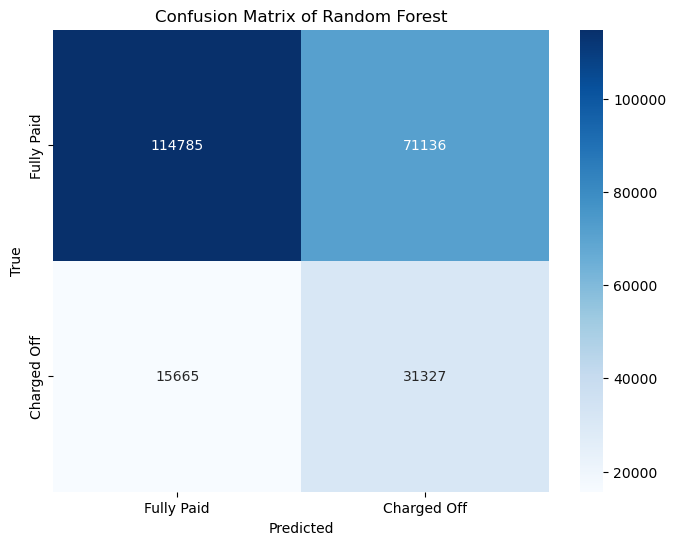

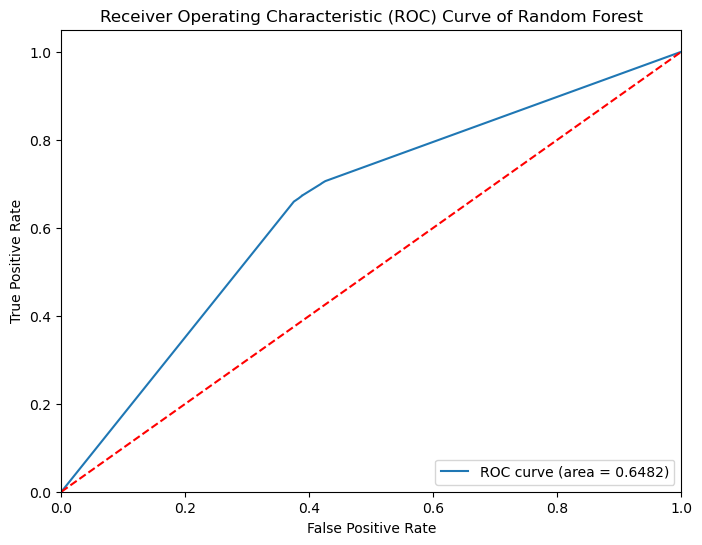

In [220]:
param_grid_rf = {
    'n_estimators':[20,50,80,100,200,300,400,500],
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    'min_samples_split':[2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
    'max_features':['sqrt','log2'],
    'max_samples':np.linspace(0.51,1,50),
    'ccp_alpha':np.linspace(0.01,1,100),
    'class_weight':[{0:1,1:n} for n in np.linspace(0.01,10,1000)]
}
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
random_rf = RandomizedSearchCV(rf, param_grid_rf, n_iter=100, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
random_rf.fit(x_train_pca, y_train)
best_params_rf = random_rf.best_params_
best_rf = random_rf.best_estimator_
print('Best parameters: ', best_params_rf)
# find for the best threshold
f1_scores_rf = []
for threshold in thresholds:
    y_val_pred_proba_rf = best_rf.predict_proba(x_val_pca)[:, 1]
    y_val_pred_rf = (y_val_pred_proba_rf >= threshold).astype(int)
    f1_scores_rf.append(f1_score(y_val, y_val_pred_rf))
best_threshold_rf = thresholds[np.argmax(f1_scores_rf)]
print('Best threshold: ', best_threshold_rf)
# fit xgboost model with best parameters
y_pred_proba_rf = best_rf.predict_proba(x_test_pca)[:, 1]
y_pred_rf = (y_pred_proba_rf >= best_threshold_rf).astype(int)
# calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
# print metrics
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1 score: {f1_rf:.4f}')
# confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Random Forest')  
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.yticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.show()
# roc curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='ROC curve (area = {:.4f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Random Forest') 
plt.legend(loc='lower right')
plt.show()


### Tomek-Links

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters:  {'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_samples': 0.52, 'max_features': 'sqrt', 'max_depth': 11, 'class_weight': {0: 1, 1: 5.04}, 'ccp_alpha': 0.02}
Best threshold:  0.62
Accuracy: 0.6321
Precision: 0.3078
Recall: 0.6593
F1 score: 0.4197


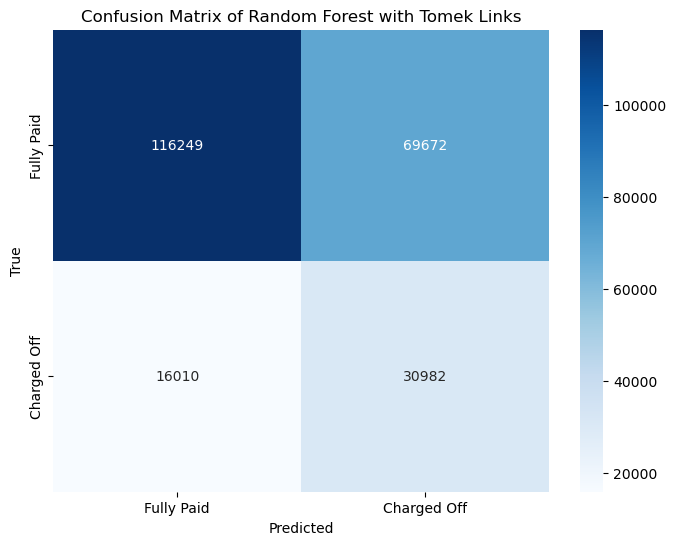

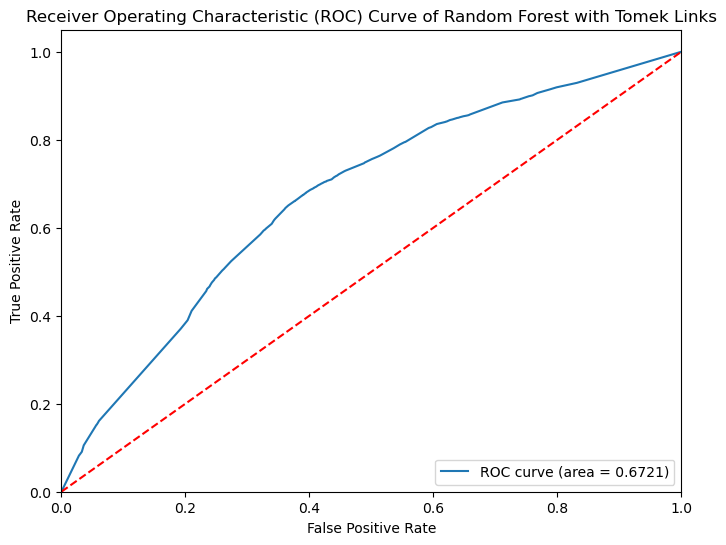

In [221]:
rf_tl = RandomForestClassifier(random_state=42, n_jobs=-1)
random_rf_tl = RandomizedSearchCV(rf_tl, param_grid_rf, n_iter=100, cv=5, scoring='roc_auc', random_state=45, n_jobs=-1)
random_rf_tl.fit(x_train_tl, y_train_tl)
best_params_rf_tl = random_rf_tl.best_params_
best_rf_tl = random_rf_tl.best_estimator_
print('Best parameters: ', best_params_rf_tl)
# find for the best threshold
f1_scores_rf_tl = []
for threshold in thresholds:
    y_val_pred_proba_rf_tl = best_rf_tl.predict_proba(x_val_pca)[:, 1]
    y_val_pred_rf_tl = (y_val_pred_proba_rf_tl >= threshold).astype(int)
    f1_scores_rf_tl.append(f1_score(y_val, y_val_pred_rf_tl))
best_threshold_rf_tl = thresholds[np.argmax(f1_scores_rf_tl)]
print('Best threshold: ', best_threshold_rf_tl)
# fit random forest model with best parameters
y_pred_proba_rf_tl = best_rf_tl.predict_proba(x_test_pca)[:, 1]
y_pred_rf_tl = (y_pred_proba_rf_tl >= best_threshold_rf_tl).astype(int)
# calculate metrics
accuracy_rf_tl = accuracy_score(y_test, y_pred_rf_tl)
precision_rf_tl = precision_score(y_test, y_pred_rf_tl)
recall_rf_tl = recall_score(y_test, y_pred_rf_tl)
f1_rf_tl = f1_score(y_test, y_pred_rf_tl)
roc_auc_rf_tl = roc_auc_score(y_test, y_pred_proba_rf_tl)
# print metrics
print(f'Accuracy: {accuracy_rf_tl:.4f}')
print(f'Precision: {precision_rf_tl:.4f}')
print(f'Recall: {recall_rf_tl:.4f}')
print(f'F1 score: {f1_rf_tl:.4f}')
# confusion matrix
cm_rf_tl = confusion_matrix(y_test, y_pred_rf_tl)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_tl, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Random Forest with Tomek Links')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.yticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.show()
# roc curve
fpr_rf_tl, tpr_rf_tl, thresholds_rf_tl = roc_curve(y_test, y_pred_proba_rf_tl)
roc_auc_rf_tl = auc(fpr_rf_tl, tpr_rf_tl)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_tl, tpr_rf_tl, label='ROC curve (area = {:.4f})'.format(roc_auc_rf_tl))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Random Forest with Tomek Links')
plt.legend(loc='lower right')
plt.show()

### Borderline-SMOTE

Best parameters:  {'n_estimators': 100, 'min_samples_split': 16, 'min_samples_leaf': 10, 'max_samples': 0.77, 'max_features': 'sqrt', 'max_depth': 2, 'class_weight': {0: 1, 1: 1.01}, 'ccp_alpha': 0.01}
Best threshold:  0.53
Accuracy: 0.6105
Precision: 0.2991
Recall: 0.6927
F1 score: 0.4178


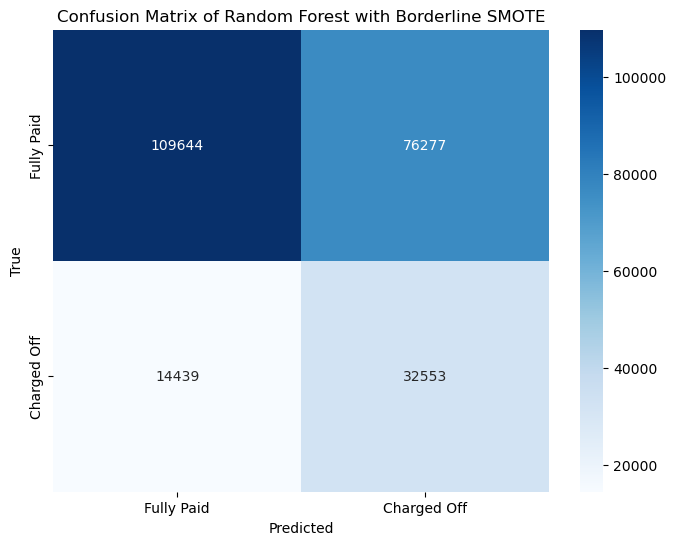

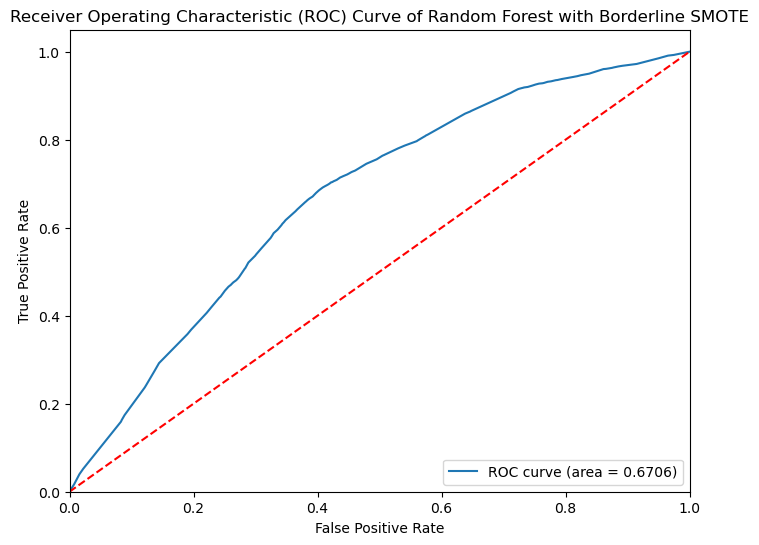

In [222]:
rf_bs = RandomForestClassifier(random_state=42, n_jobs=-1)
random_rf_bs = RandomizedSearchCV(rf_bs, param_grid_rf, n_iter=100, cv=5, scoring='roc_auc', random_state=123, n_jobs=-1)
random_rf_bs.fit(x_train_bsmote, y_train_bsmote)
best_params_rf_bs = random_rf_bs.best_params_
best_rf_bs = random_rf_bs.best_estimator_
print('Best parameters: ', best_params_rf_bs)
# find for the best threshold
f1_scores_rf_bs = []
for threshold in thresholds:
    y_val_pred_proba_rf_bs = best_rf_bs.predict_proba(x_val_pca)[:, 1]
    y_val_pred_rf_bs = (y_val_pred_proba_rf_bs >= threshold).astype(int)
    f1_scores_rf_bs.append(f1_score(y_val, y_val_pred_rf_bs))
best_threshold_rf_bs = thresholds[np.argmax(f1_scores_rf_bs)]
print('Best threshold: ', best_threshold_rf_bs)
# fit random forest model with best parameters
y_pred_proba_rf_bs = best_rf_bs.predict_proba(x_test_pca)[:, 1]
y_pred_rf_bs = (y_pred_proba_rf_bs >= best_threshold_rf_bs).astype(int)
# calculate metrics
accuracy_rf_bs = accuracy_score(y_test, y_pred_rf_bs)
precision_rf_bs = precision_score(y_test, y_pred_rf_bs)
recall_rf_bs = recall_score(y_test, y_pred_rf_bs)
f1_rf_bs = f1_score(y_test, y_pred_rf_bs)
roc_auc_rf_bs = roc_auc_score(y_test, y_pred_proba_rf_bs)
# print metrics
print(f'Accuracy: {accuracy_rf_bs:.4f}')
print(f'Precision: {precision_rf_bs:.4f}')
print(f'Recall: {recall_rf_bs:.4f}')
print(f'F1 score: {f1_rf_bs:.4f}')
# confusion matrix
cm_rf_bs = confusion_matrix(y_test, y_pred_rf_bs)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_bs, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Random Forest with Borderline SMOTE')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.yticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.show()
# roc curve
fpr_rf_bs, tpr_rf_bs, thresholds_rf_bs = roc_curve(y_test, y_pred_proba_rf_bs)
roc_auc_rf_bs = auc(fpr_rf_bs, tpr_rf_bs)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_bs, tpr_rf_bs, label='ROC curve (area = {:.4f})'.format(roc_auc_rf_bs))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Random Forest with Borderline SMOTE')
plt.legend(loc='lower right')
plt.show()

### SMOTEENN

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters:  {'n_estimators': 200, 'min_samples_split': 14, 'min_samples_leaf': 8, 'max_samples': 0.69, 'max_features': 'sqrt', 'max_depth': 2, 'class_weight': {0: 1, 1: 1.61}, 'ccp_alpha': 0.02}
Best threshold:  0.76
Accuracy: 0.5074
Precision: 0.2667
Recall: 0.8244
F1 score: 0.4031


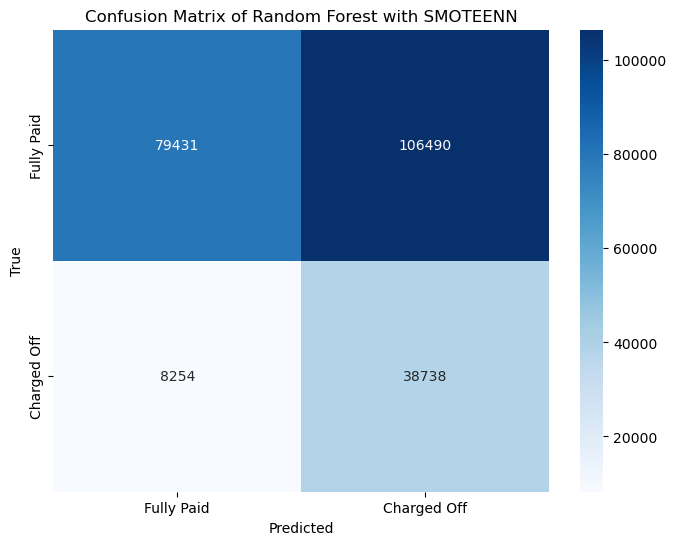

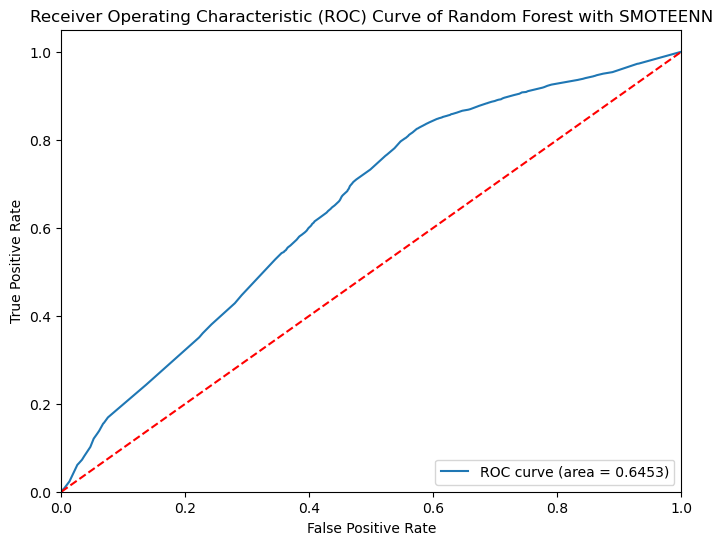

In [223]:
rf_se = RandomForestClassifier(random_state=42, n_jobs=-1)
random_rf_se = RandomizedSearchCV(rf_se, param_grid_rf, n_iter=100, cv=5, scoring='roc_auc', random_state=0, n_jobs=-1)
random_rf_se.fit(x_train_se, y_train_se)
best_params_rf_se = random_rf_se.best_params_
best_rf_se = random_rf_se.best_estimator_
print('Best parameters: ', best_params_rf_se)
# find for the best threshold
f1_scores_rf_se = []
for threshold in thresholds:
    y_val_pred_proba_rf_se = best_rf_se.predict_proba(x_val_pca)[:, 1]
    y_val_pred_rf_se = (y_val_pred_proba_rf_se >= threshold).astype(int)
    f1_scores_rf_se.append(f1_score(y_val, y_val_pred_rf_se))
best_threshold_rf_se = thresholds[np.argmax(f1_scores_rf_se)]
print('Best threshold: ', best_threshold_rf_se)
# fit random forest model with best parameters
y_pred_proba_rf_se = best_rf_se.predict_proba(x_test_pca)[:, 1]
y_pred_rf_se = (y_pred_proba_rf_se >= best_threshold_rf_se).astype(int)
# calculate metrics
accuracy_rf_se = accuracy_score(y_test, y_pred_rf_se)
precision_rf_se = precision_score(y_test, y_pred_rf_se)
recall_rf_se = recall_score(y_test, y_pred_rf_se)
f1_rf_se = f1_score(y_test, y_pred_rf_se)
roc_auc_rf_se = roc_auc_score(y_test, y_pred_proba_rf_se)
# print metrics
print(f'Accuracy: {accuracy_rf_se:.4f}')
print(f'Precision: {precision_rf_se:.4f}')
print(f'Recall: {recall_rf_se:.4f}')
print(f'F1 score: {f1_rf_se:.4f}')
# confusion matrix
cm_rf_se = confusion_matrix(y_test, y_pred_rf_se)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_se, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Random Forest with SMOTEENN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.yticks(ticks=[0.5, 1.5], labels=['Fully Paid', 'Charged Off'])
plt.show()
# roc curve
fpr_rf_se, tpr_rf_se, thresholds_rf_se = roc_curve(y_test, y_pred_proba_rf_se)
roc_auc_rf_se = auc(fpr_rf_se, tpr_rf_se)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_se, tpr_rf_se, label='ROC curve (area = {:.4f})'.format(roc_auc_rf_se))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Random Forest with SMOTEENN')
plt.legend(loc='lower right')
plt.show()